User dataset generation 

In [85]:
import pandas as pd
import numpy as np
import random

random.seed(42)
np.random.seed(42)

genders = ['female', 'male']
gender_weights = [0.6, 0.4]

age_distribution = [(18, 24), (25, 34), (35, 44), (45, 60), (61, 75)]
age_probs = [0.10, 0.35, 0.30, 0.15, 0.10]

# Goal options by age group
def get_goals_by_age(age, gender):
    gender = gender.lower()  

    if age >= 61:
        return (
            ['elderly fitness', 'rehabilitation', 'yoga', 'flexibility', 'cardio', 'weight loss'],
            [0.25, 0.25, 0.20, 0.15, 0.10, 0.05]
        )

    elif age >= 46:
        return (
            ['rehabilitation', 'flexibility', 'yoga', 'weight loss', 'cardio'],
            [0.25, 0.30, 0.20, 0.15, 0.10]
        )

    elif age >= 31:
        if gender == "female":
            return (
                ['weight loss', 'strength training', 'muscle building', 'flexibility', 'rehabilitation'],
                [0.35, 0.25, 0.15, 0.15, 0.10]
            )
        else:  # male
            return (
                ['strength training', 'muscle building', 'weight loss', 'flexibility', 'rehabilitation'],
                [0.30, 0.25, 0.20, 0.15, 0.10]
            )

    else:  # age < 31
        if gender == "female":
            return (
                ['weight loss', 'hiit', 'muscle building', 'pilates', 'cardio', 'yoga', 'rehabilitation'],
                [0.30, 0.25, 0.15, 0.10, 0.10, 0.05, 0.05]
            )
        else:  # male
            return (
                ['muscle building', 'hiit', 'weight loss', 'strength training', 'cardio', 'rehabilitation', 'yoga'],
                [0.30, 0.25, 0.15, 0.15, 0.10, 0.03, 0.02]
            )


# Generate users
def generate_realistic_users(num_users=12000):
    users = []

    for i in range(1, num_users + 1):
        user_id = f"U{i:05d}"
        gender = random.choices(genders, weights=gender_weights)[0]
        age_range = random.choices(age_distribution, weights=age_probs)[0]
        age = random.randint(*age_range)

        # Assign goal based on age
        possible_goals, weights = get_goals_by_age(age, gender)
        primary_goal = random.choices(possible_goals, weights=weights)[0]

        users.append({
            "user_id": user_id,
            "age": age,
            "gender": gender,
            "primary_goal": primary_goal,
        })

    return pd.DataFrame(users)

users_df = generate_realistic_users(12000)
users_df.to_excel("users.xlsx", index=False)

# Display first few rows
print(users_df.head())


  user_id  age  gender     primary_goal
0  U00001   20    male  muscle building
1  U00002   33  female      weight loss
2  U00003   19  female      weight loss
3  U00004   43    male  muscle building
4  U00005   25  female          pilates


/var/folders/n3/sn521v9903dbc_0wr7wh55c40000gn/T/ipykernel_1320/2162180188.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='primary_goal', data=users_df, order=top_goals, palette="viridis")


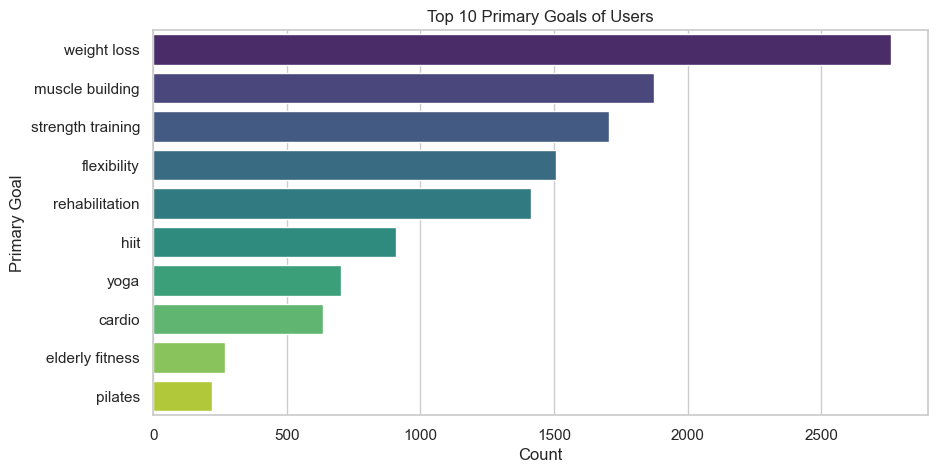

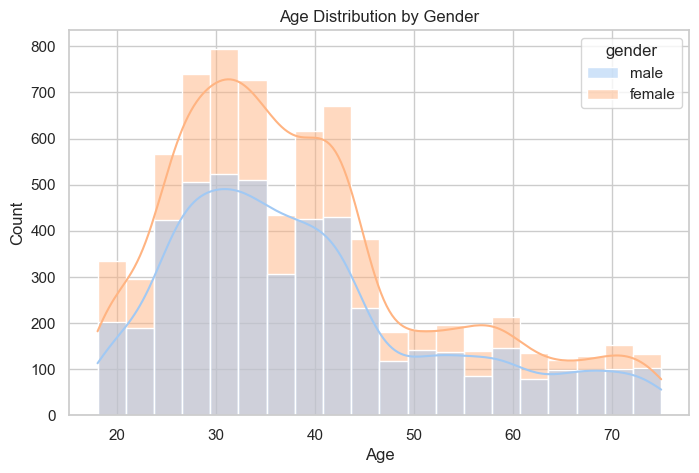

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load user dataset
users_df = pd.read_excel("users.xlsx")

sns.set(style="whitegrid")

# 3. Primary goal distribution (Top 10)
plt.figure(figsize=(10, 5))
top_goals = users_df['primary_goal'].value_counts().head(10).index
sns.countplot(y='primary_goal', data=users_df, order=top_goals, palette="viridis")
plt.title("Top 10 Primary Goals of Users")
plt.xlabel("Count")
plt.ylabel("Primary Goal")
plt.show()

# 4. Age distribution by gender
plt.figure(figsize=(8, 5))
sns.histplot(data=users_df, x='age', hue='gender', bins=20, kde=True, palette="pastel")
plt.title("Age Distribution by Gender")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()



Normalising trainer dataset 


Summary Statistics with Skewness:

                          count         mean            std    min       25%  \
trainer_id               1000.0     500.5000     288.819436    1.0    250.75   
videos_count             1000.0     256.5870     145.304335    5.0    130.75   
total_likes              1000.0  134222.6320  111267.159967  309.0  43139.75   
workout_recommendations  1000.0     105.0510      55.766444   10.0     54.00   
athlete_rating           1000.0       4.0025       0.577700    3.0      3.50   
years_experience         1000.0      12.8220       6.909708    1.0      7.00   

                              50%        75%       max  Skewness  
trainer_id                  500.5     750.25    1000.0  0.000000  
videos_count                254.5     382.25     499.0 -0.028943  
total_likes              108735.0  203181.00  582574.0  1.025230  
workout_recommendations     107.0     154.00     199.0 -0.014758  
athlete_rating                4.0       4.50       5.0 -0.041783  
y

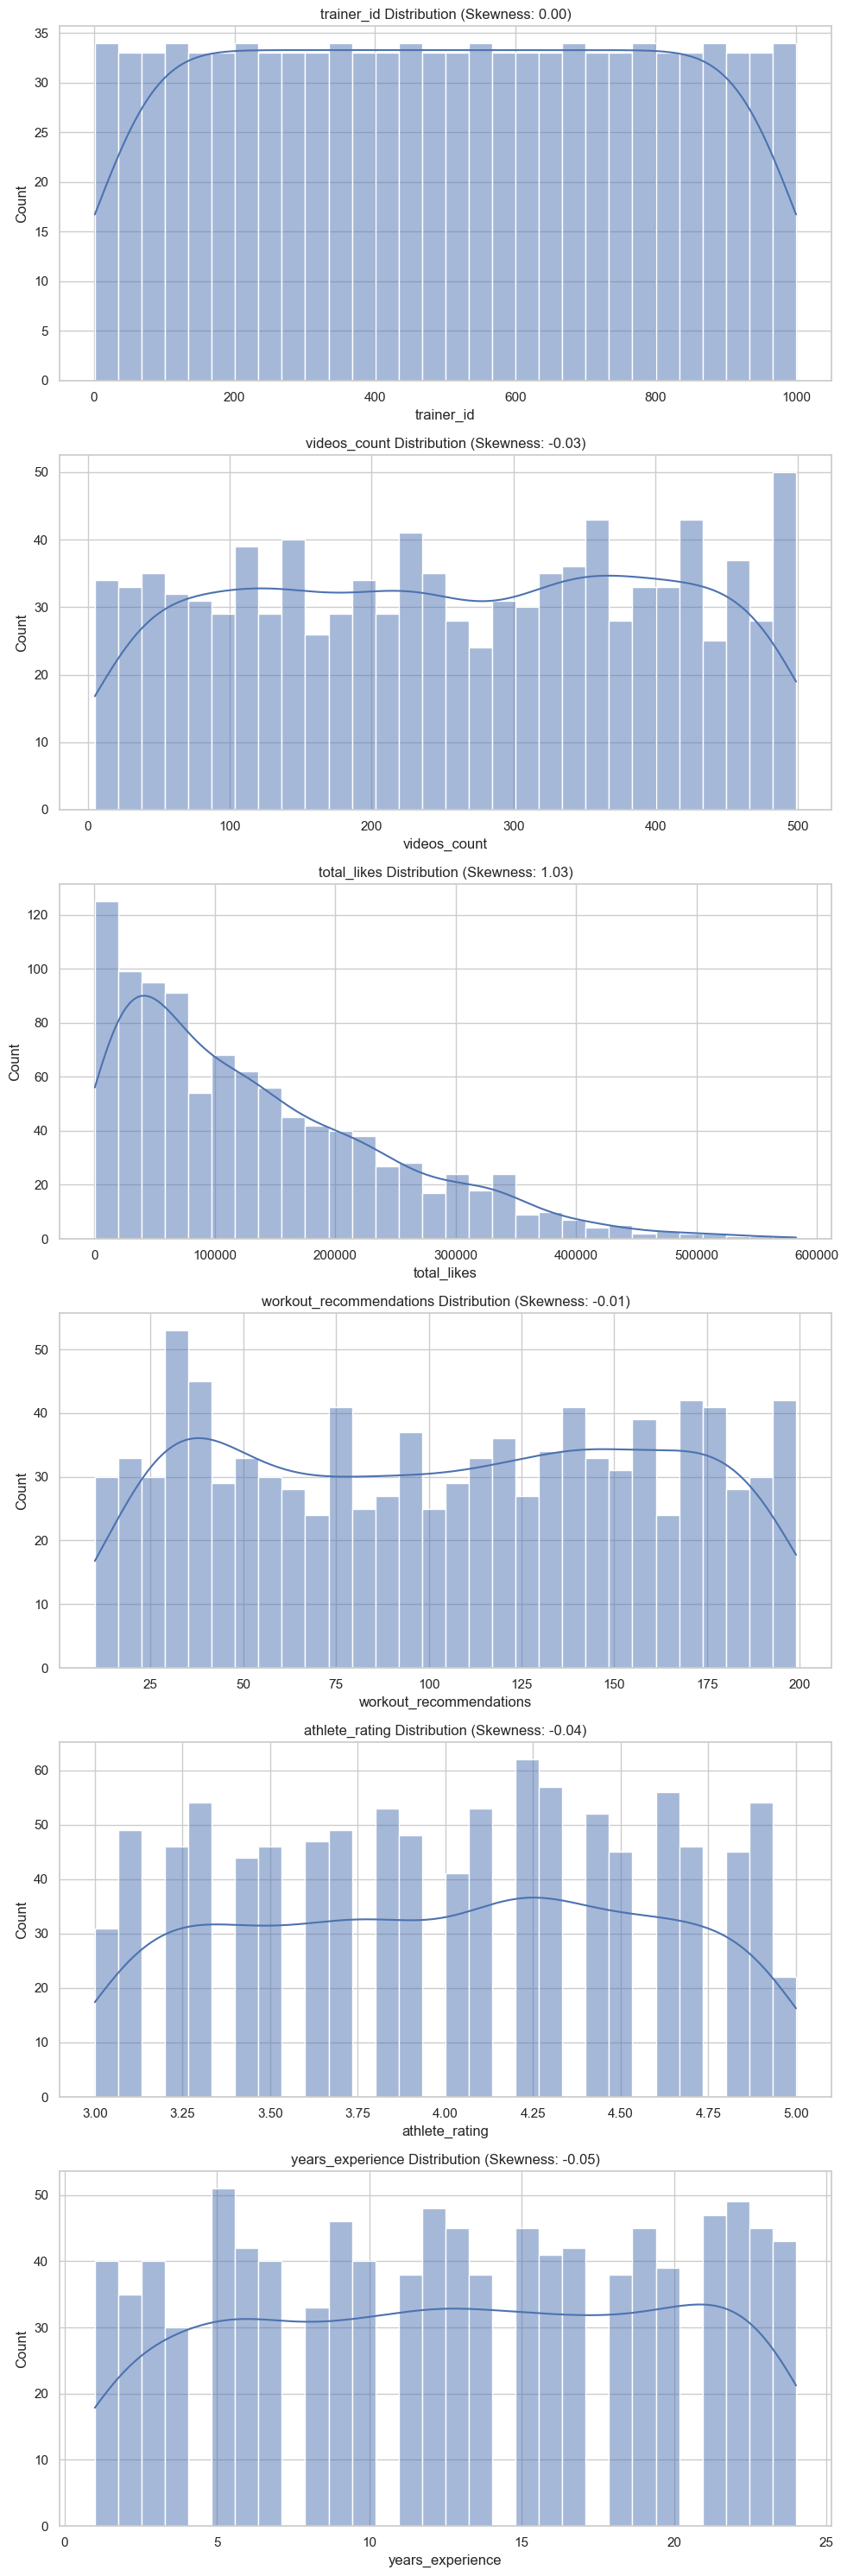

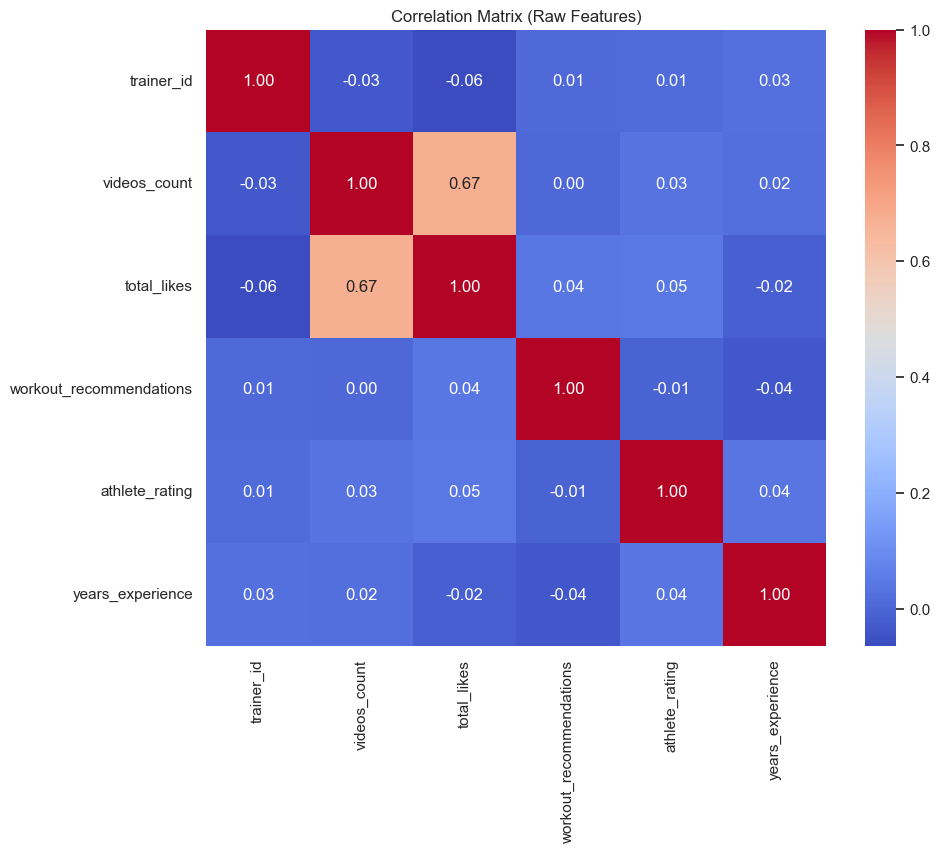

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load trainer dataset
df = pd.read_excel("PT_Dataset.xlsx")

# Summary statistics and skewness
summary = df.describe().transpose()
skewness = df.select_dtypes(include='number').skew().to_frame(name='Skewness')
summary_with_skew = summary.merge(skewness, left_index=True, right_index=True)
print("\nSummary Statistics with Skewness:\n")
print(summary_with_skew)

# Histograms of all numeric features
numeric_cols = df.select_dtypes(include='number').columns.tolist()
fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(10, 5 * len(numeric_cols)))

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"{col} Distribution (Skewness: {df[col].skew():.2f})")
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

# Raw correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Raw Features)")
plt.show()



In [88]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler

df = pd.read_excel("PT_Dataset.xlsx")

# 1. videos_count → z-score
df["videos_z"] = (df["videos_count"] - df["videos_count"].mean()) / df["videos_count"].std()

# 2. total_likes → log1p + z-score
df["likes_log"] = np.log1p(df["total_likes"])
df["likes_log_z"] = (df["likes_log"] - df["likes_log"].mean()) / df["likes_log"].std()

# 3. workout_recommendations → robust scaler
df["recommendations_scaled"] = RobustScaler().fit_transform(df[["workout_recommendations"]])

# 4. athlete_rating → scale to [0,1] by dividing by max rating (5)
df["rating_scaled"] = df["athlete_rating"] / 5.0

# 5. years_experience → bucket tiers
bins = [0, 3, 9, 15, np.inf]
labels = [1, 2, 3, 4]
df["experience_tier"] = pd.cut(df["years_experience"], bins=bins, labels=labels, include_lowest=True).astype(int)


normalized_df = df[[
    "trainer_id", "videos_z", "likes_log_z",
    "recommendations_scaled", "rating_scaled", "experience_tier", "specialities"
]]
normalized_df.to_excel("normalized_trainers.xlsx", index=False)



 Normalized Feature Summary with Skewness:

                         count          mean         std       min  \
trainer_id              1000.0  5.005000e+02  288.819436  1.000000   
videos_z                1000.0  6.750156e-17    1.000000 -1.731449   
likes_log_z             1000.0 -9.467982e-16    1.000000 -4.859203   
recommendations_scaled  1000.0 -1.949000e-02    0.557664 -0.970000   
rating_scaled           1000.0  8.005000e-01    0.115540  0.600000   
experience_tier         1000.0  2.917000e+00    1.041728  1.000000   

                               25%         50%         75%          max  \
trainer_id              250.750000  500.500000  750.250000  1000.000000   
videos_z                 -0.866024   -0.014363    0.864826     1.668312   
likes_log_z              -0.573559    0.229149    0.771996     1.686629   
recommendations_scaled   -0.530000    0.000000    0.470000     0.920000   
rating_scaled             0.700000    0.800000    0.900000     1.000000   
experience_tie

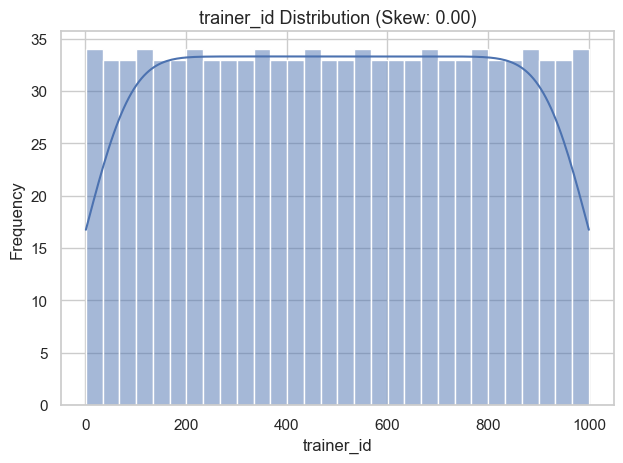

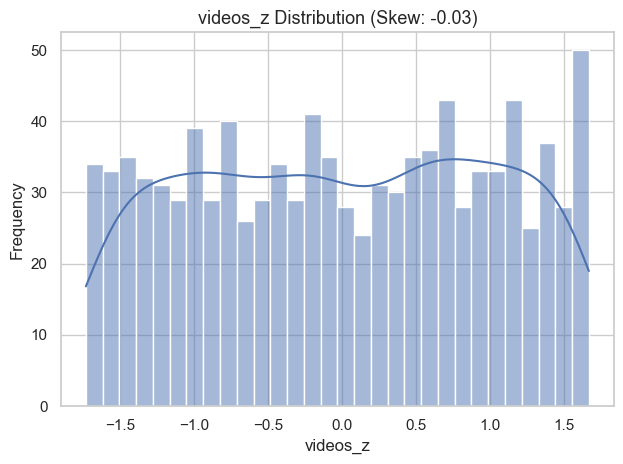

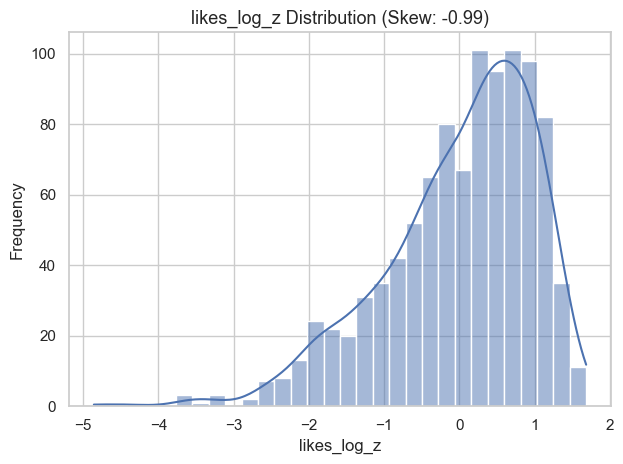

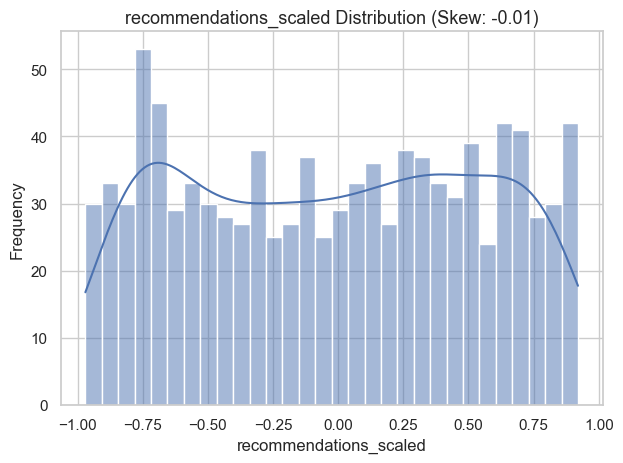

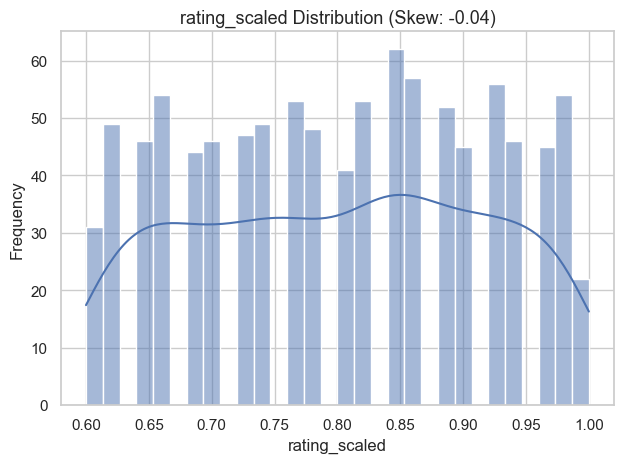

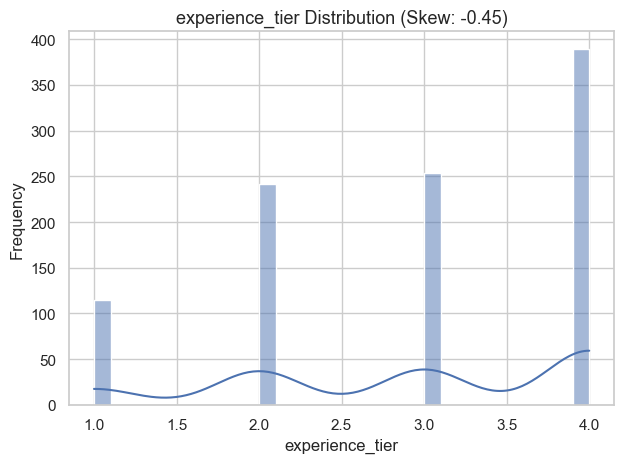

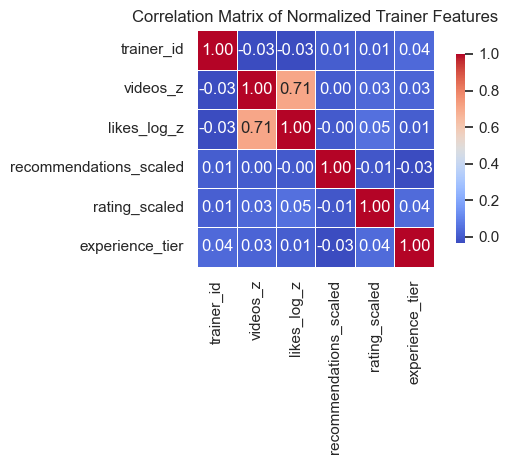

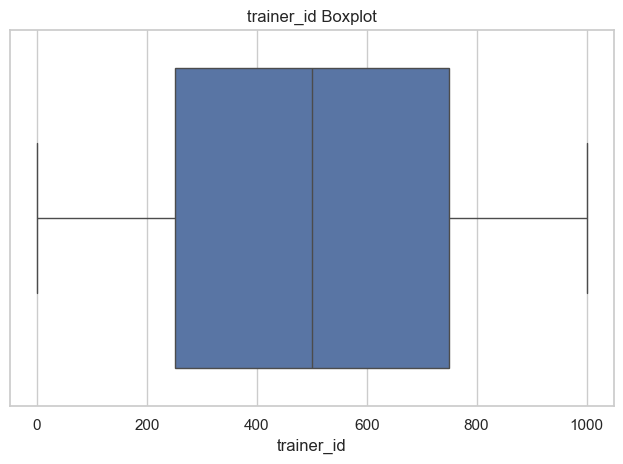

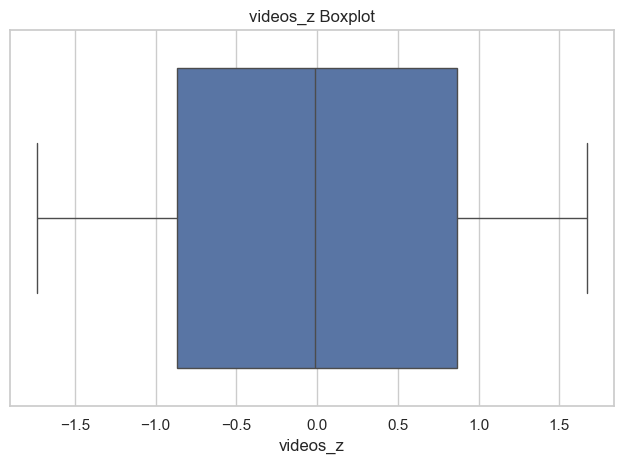

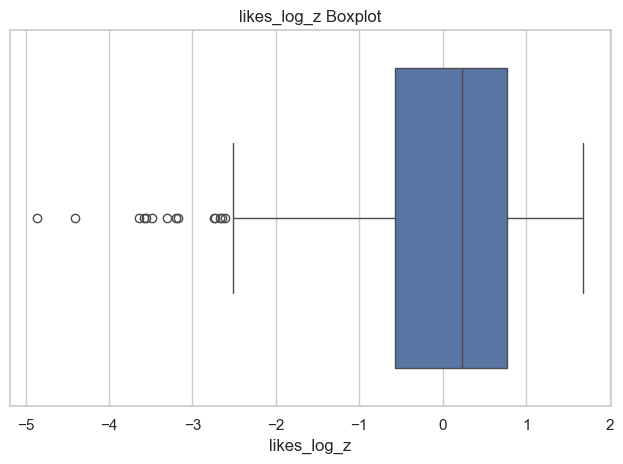

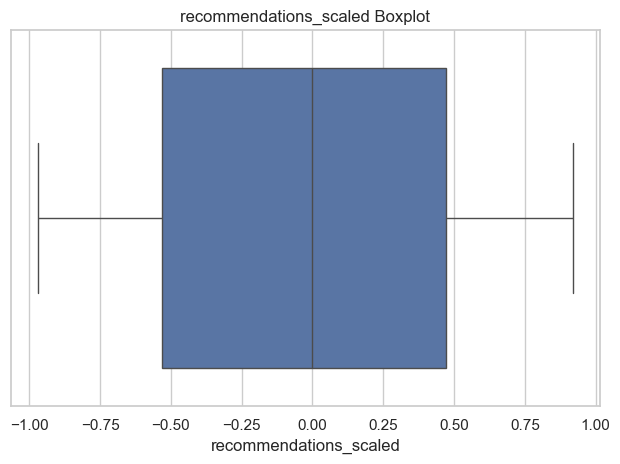

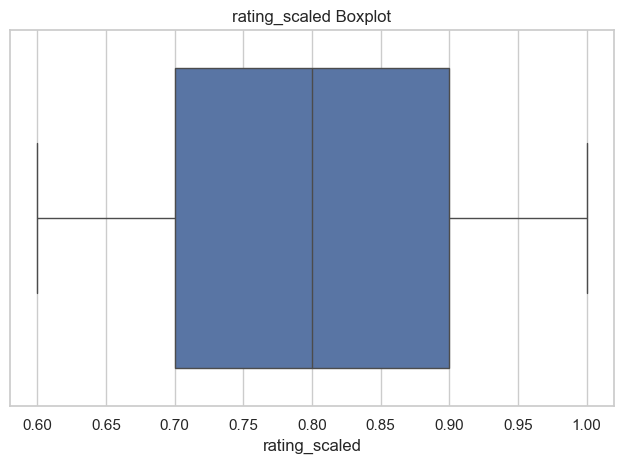

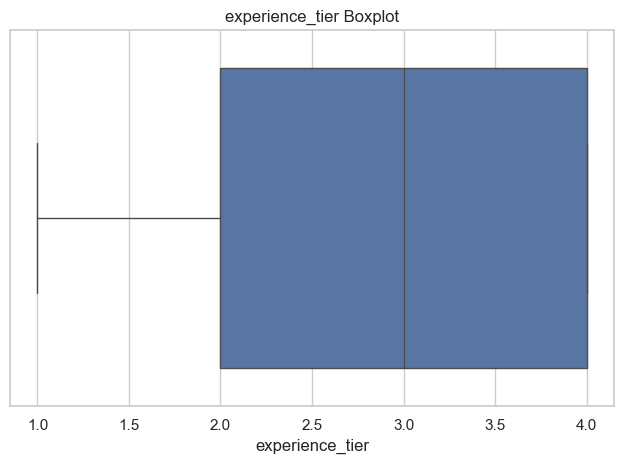

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load normalized trainer dataset
df = pd.read_excel("normalized_trainers.xlsx")

sns.set_theme(style="whitegrid")

# Show summary and skewness
summary = df.describe().T
skewness = df.select_dtypes(include='number').skew().to_frame(name='Skewness')
summary_with_skew = summary.merge(skewness, left_index=True, right_index=True)

print("\n Normalized Feature Summary with Skewness:\n")
print(summary_with_skew)

# Histograms for numeric features
numeric_cols = df.select_dtypes(include='number').columns.tolist()

for col in numeric_cols:
    plot = sns.histplot(df[col], bins=30, kde=True)
    plot.set_title(f"{col} Distribution (Skew: {df[col].skew():.2f})", fontsize=13)
    plot.set_xlabel(col)
    plot.set_ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Correlation heatmap
corr = df[numeric_cols].corr()

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8}
).set_title("Correlation Matrix of Normalized Trainer Features")
plt.tight_layout()
plt.show()

# Boxplots to visually check for range
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(f"{col} Boxplot")
    plt.tight_layout()
    plt.show()


Interaction Dataset 


In [90]:
import pandas as pd
import numpy as np
import random

# Set random seeds
random.seed(42)
np.random.seed(42)

# Load user and trainer datasets
user_df = pd.read_excel("users.xlsx")                      
trainer_df = pd.read_excel("PT_Dataset.xlsx")              
normalized_df = pd.read_excel("normalized_trainers.xlsx")  

# Build a lookup dictionary for trainer quality 
trainer_quality_lookup = dict(zip(normalized_df["trainer_id"], normalized_df["rating_scaled"]))

# Store all interaction records
feedback_data = []

# Loop through each user
for _, user in user_df.iterrows():
    user_id = user["user_id"]

    # Sample 10-30 random trainers per user
    sampled_trainers = trainer_df.sample(random.randint(10, 30))

    for _, trainer in sampled_trainers.iterrows():
        trainer_id = trainer["trainer_id"]

        # Get trainer quality from normalized dataset, fallback to 0.5
        trainer_quality = trainer_quality_lookup.get(trainer_id, 0.5)

        # Assign user engagement tier
        user_type = np.random.choice(
            ["early_exit", "partial", "full"],
            p=[0.15, 0.52, 0.33]
        )

        # Simulate watch percentage based on user type
        if user_type == "early_exit":
            watch_percent = np.random.uniform(0.01, 0.10)
        elif user_type == "partial":
            watch_percent = np.random.uniform(0.3, 0.7)
        else:  # full
            watch_percent = np.random.uniform(0.9, 1.0)

        # Compute rating probability
        if watch_percent < 0.1:
            p_rated = 0.05  
        else:
            p_rated = 0.05 + 0.3 * watch_percent + 0.2 * trainer_quality

        rated_flag = int(random.random() < min(p_rated, 1.0))

        # Final engagement score with chosen weights
        engagement_score = (
            0.60 * watch_percent +
            0.30 * rated_flag +
            0.10 * trainer_quality
        )
        engagement_score = round(min(max(engagement_score, 0.0), 1.0), 3)

        # Store the interaction
        feedback_data.append({
            "user_id": user_id,
            "trainer_id": trainer_id,
            "watch_percent": round(watch_percent, 3),
            "rated_flag": rated_flag,
            "trainer_quality": round(trainer_quality, 3),
            "engagement_score": engagement_score
        })

# Save to DataFrame and Excel
engagement_df = pd.DataFrame(feedback_data)
engagement_df.to_excel("interaction.xlsx", index=False)




In [91]:
# Number of users and trainers
num_users = engagement_df["user_id"].nunique()
num_trainers = engagement_df["trainer_id"].nunique()

# Total possible interactions
total_possible = num_users * num_trainers

# Actual number of interactions
num_interactions = len(engagement_df)

# Density and sparsity
density = num_interactions / total_possible
sparsity = 1 - density

print(f"Number of users: {num_users}")
print(f"Number of trainers: {num_trainers}")
print(f"Number of interactions: {num_interactions}")
print(f"Matrix density: {density:.4f} ({density*100:.2f}%)")
print(f"Matrix sparsity: {sparsity:.4f} ({sparsity*100:.2f}%)")


Number of users: 12000
Number of trainers: 1000
Number of interactions: 240171
Matrix density: 0.0200 (2.00%)
Matrix sparsity: 0.9800 (98.00%)


ERROR CHECKS:
- Missing values:
 user_id             0
trainer_id          0
watch_percent       0
rated_flag          0
trainer_quality     0
engagement_score    0
user_type           0
dtype: int64
- Invalid watch_percent: 0
- Invalid rated_flag values: 0
- engagement_score out of bounds: 0
- trainer_quality out of bounds: 0

ESCRIPTIVE STATISTICS:
       watch_percent  rated_flag  trainer_quality  engagement_score
count     240171.000  240171.000       240171.000        240171.000
mean           0.581       0.357            0.800             0.536
std            0.312       0.479            0.116             0.267
min            0.010       0.000            0.600             0.066
25%            0.377       0.000            0.700             0.332
50%            0.569       0.000            0.800             0.584
75%            0.924       1.000            0.900             0.699
max            1.000       1.000            1.000             1.000


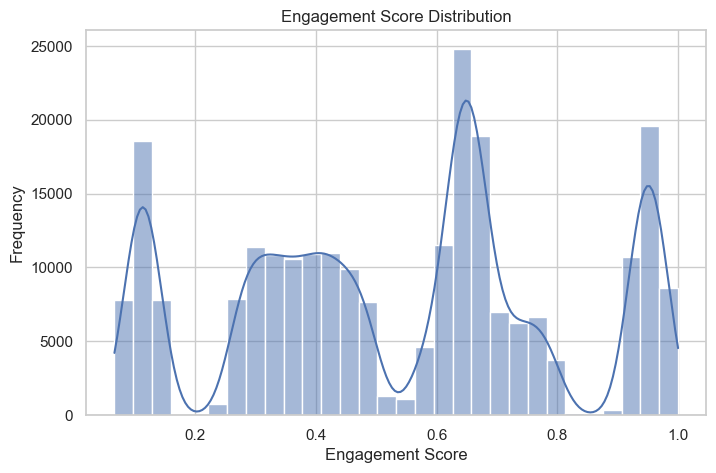

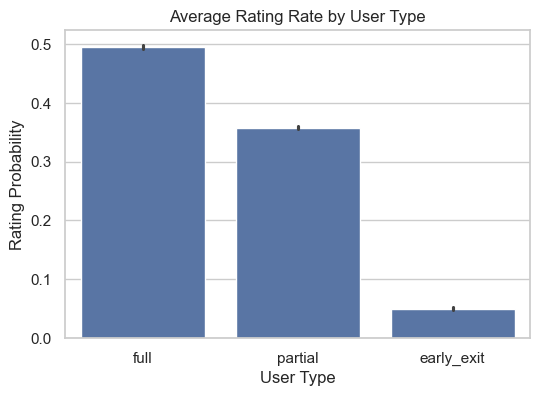

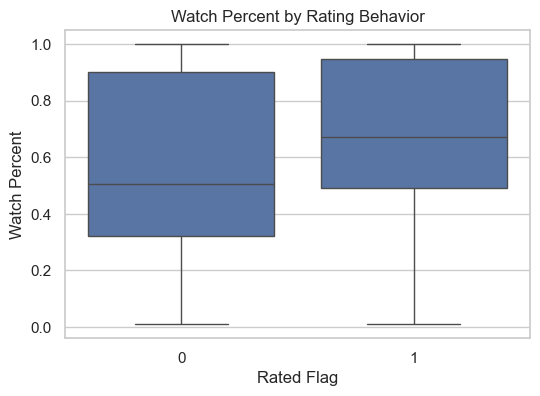

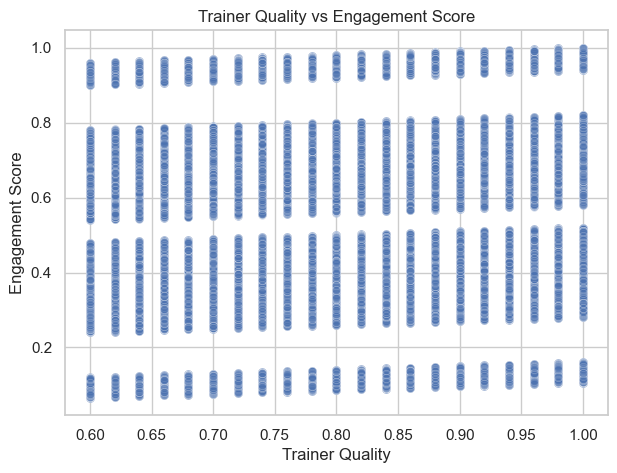

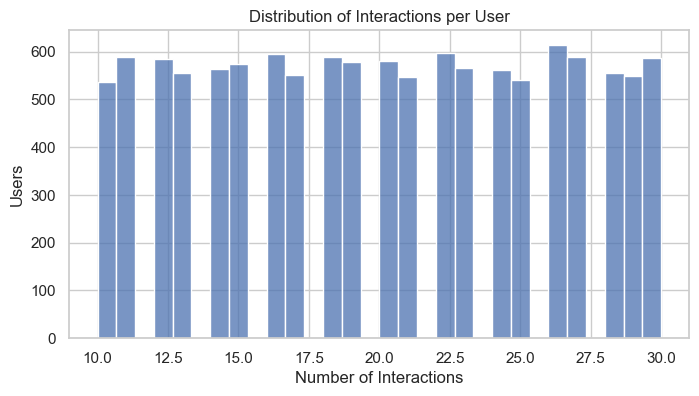

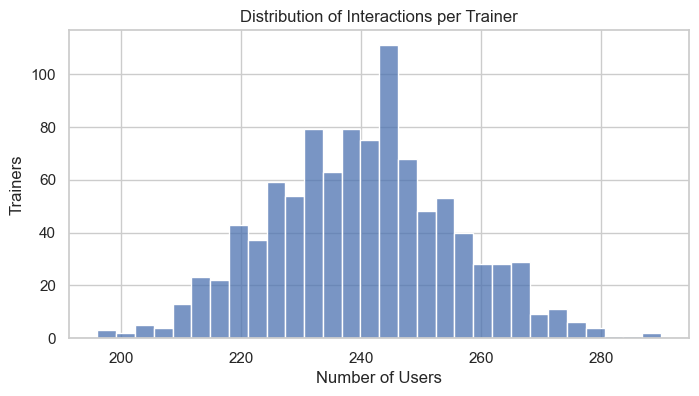

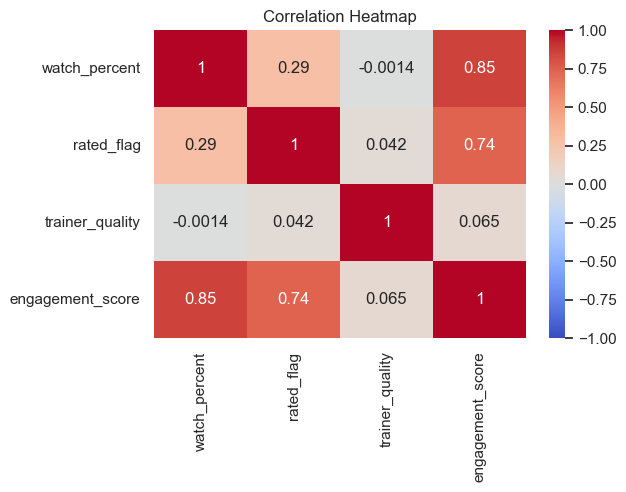

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel("interaction.xlsx")

# 1. Add user_type based on watch_percent
def classify_user_type(watch_percent):
    if watch_percent < 0.1:
        return "early_exit"
    elif watch_percent < 0.7:
        return "partial"
    else:
        return "full"

df["user_type"] = df["watch_percent"].apply(classify_user_type)

# 2. ERROR CHECKS
print("ERROR CHECKS:")
print("- Missing values:\n", df.isnull().sum())
print("- Invalid watch_percent:", df[(df["watch_percent"] < 0) | (df["watch_percent"] > 1)].shape[0])
print("- Invalid rated_flag values:", df[~df["rated_flag"].isin([0, 1])].shape[0])
print("- engagement_score out of bounds:", df[(df["engagement_score"] < 0) | (df["engagement_score"] > 1)].shape[0])
print("- trainer_quality out of bounds:", df[(df["trainer_quality"] < 0) | (df["trainer_quality"] > 1)].shape[0])

# 3. STATISTICS
print("\nESCRIPTIVE STATISTICS:")
print(df[["watch_percent", "rated_flag", "trainer_quality", "engagement_score"]].describe().round(3))

# 4. PLOTS 

sns.set(style="whitegrid")

# Plot 1: Engagement Score Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["engagement_score"], kde=True, bins=30)
plt.title("Engagement Score Distribution")
plt.xlabel("Engagement Score")
plt.ylabel("Frequency")
plt.show()

# Plot 2: Rating Rate by User Type
plt.figure(figsize=(6, 4))
sns.barplot(x="user_type", y="rated_flag", data=df, estimator=np.mean)
plt.title("Average Rating Rate by User Type")
plt.ylabel("Rating Probability")
plt.xlabel("User Type")
plt.show()

# Plot 3: Watch Percent by Rating Behavior
plt.figure(figsize=(6, 4))
sns.boxplot(x="rated_flag", y="watch_percent", data=df)
plt.title("Watch Percent by Rating Behavior")
plt.xlabel("Rated Flag")
plt.ylabel("Watch Percent")
plt.show()

# Plot 4: Trainer Quality vs Engagement Score
plt.figure(figsize=(7, 5))
sns.scatterplot(x="trainer_quality", y="engagement_score", data=df, alpha=0.3)
plt.title("Trainer Quality vs Engagement Score")
plt.xlabel("Trainer Quality")
plt.ylabel("Engagement Score")
plt.show()

# Plot 5: Interactions per User
plt.figure(figsize=(8, 4))
user_counts = df["user_id"].value_counts()
sns.histplot(user_counts, bins=30)
plt.title("Distribution of Interactions per User")
plt.xlabel("Number of Interactions")
plt.ylabel("Users")
plt.show()

# Plot 6: Interactions per Trainer
plt.figure(figsize=(8, 4))
trainer_counts = df["trainer_id"].value_counts()
sns.histplot(trainer_counts, bins=30)
plt.title("Distribution of Interactions per Trainer")
plt.xlabel("Number of Users")
plt.ylabel("Trainers")
plt.show()

# Plot 7: Correlation Heatmap 
plt.figure(figsize=(6, 4))
corr = df[["watch_percent", "rated_flag", "trainer_quality", "engagement_score"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()


1. Weighted scoring algorithm 

<Figure size 1200x600 with 0 Axes>

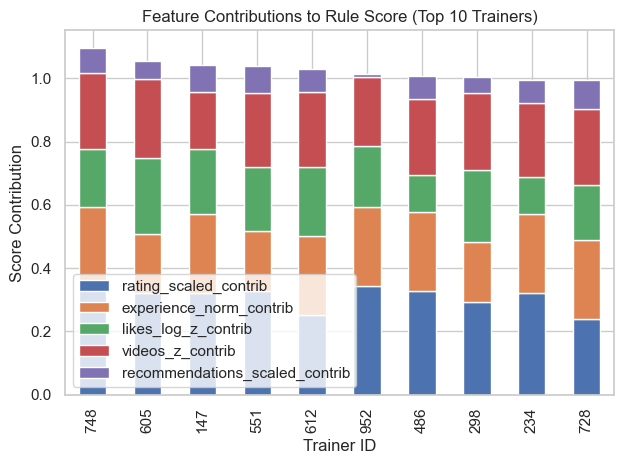

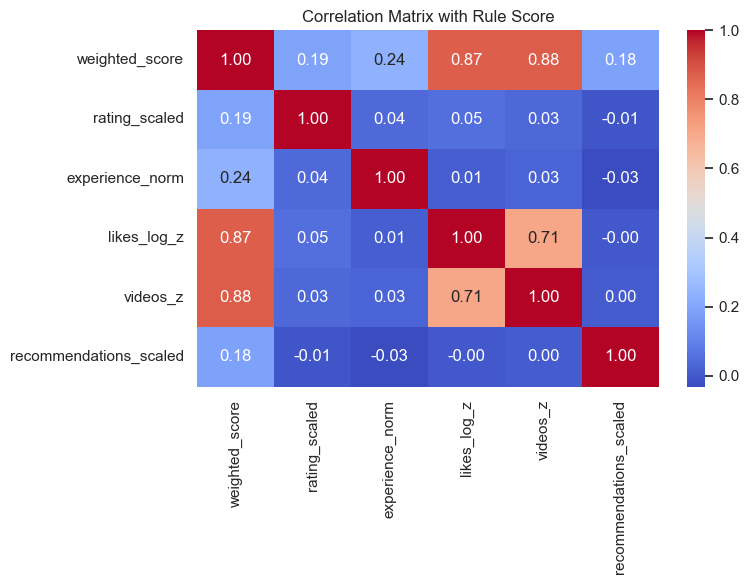

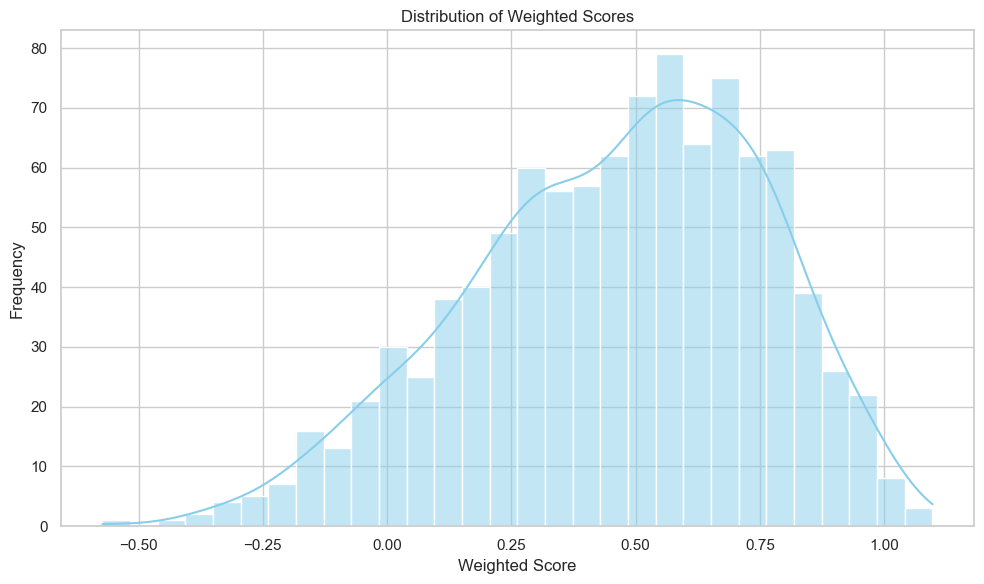

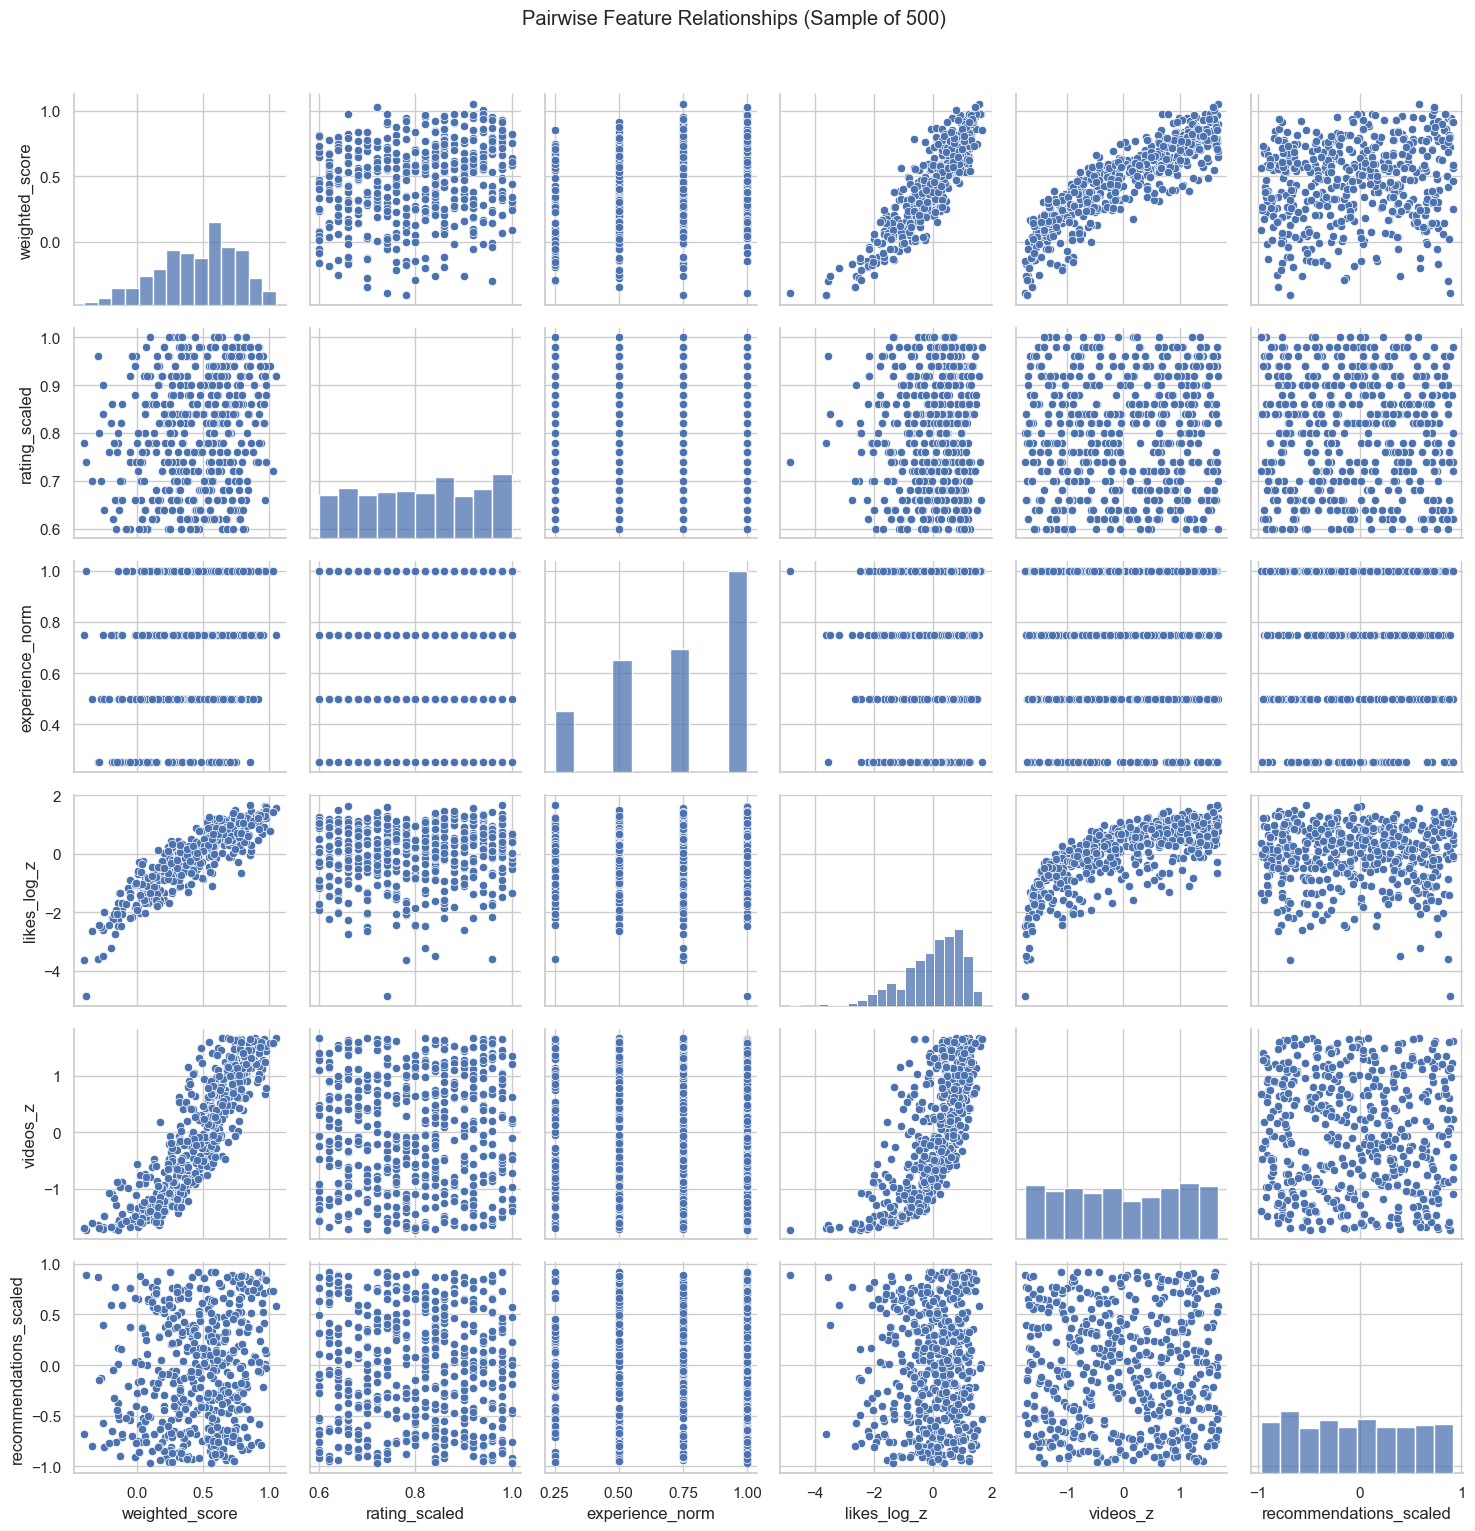

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
trainers_df = pd.read_excel("normalized_trainers.xlsx")

# Normalize experience tier
trainers_df["experience_norm"] = trainers_df["experience_tier"] / trainers_df["experience_tier"].max()

# Define feature weights
weights = {
    "rating_scaled": 0.35,
    "experience_norm": 0.25,
    "likes_log_z": 0.15,
    "videos_z": 0.15,
    "recommendations_scaled": 0.10
}

# Compute weighted score
trainers_df["weighted_score"] = (
    weights["rating_scaled"] * trainers_df["rating_scaled"] +
    weights["experience_norm"] * trainers_df["experience_norm"] +
    weights["likes_log_z"] * trainers_df["likes_log_z"] +
    weights["videos_z"] * trainers_df["videos_z"] +
    weights["recommendations_scaled"] * trainers_df["recommendations_scaled"]
)

# Feature contribution breakdown for top 10 trainers
top_n = 10
top_df = trainers_df.sort_values(by="weighted_score", ascending=False).head(top_n).copy()
for feature, weight in weights.items():
    top_df[f"{feature}_contrib"] = top_df[feature] * weight

contrib_cols = [f"{f}_contrib" for f in weights.keys()]
top_df_plot = top_df[contrib_cols]
top_df_plot.index = top_df['trainer_id']

plt.figure(figsize=(12, 6))
top_df_plot.plot(kind='bar', stacked=True)
plt.title("Feature Contributions to Rule Score (Top 10 Trainers)")
plt.xlabel("Trainer ID")
plt.ylabel("Score Contribution")
plt.tight_layout()
plt.show()

# Correlation heatmap between features and rule score
plt.figure(figsize=(8, 6))
corr = trainers_df[["weighted_score"] + list(weights.keys())].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix with Rule Score")
plt.tight_layout()
plt.show()

# Distribution of rule scores
plt.figure(figsize=(10, 6))
sns.histplot(trainers_df["weighted_score"], kde=True, bins=30, color="skyblue")
plt.title("Distribution of Weighted Scores")
plt.xlabel("Weighted Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Pairwise feature plots (sample for readability)
plot_features = ["weighted_score"] + list(weights.keys())
sns.pairplot(trainers_df[plot_features].sample(n=500, random_state=42))
plt.suptitle("Pairwise Feature Relationships (Sample of 500)", y=1.02)
plt.tight_layout()
plt.show()


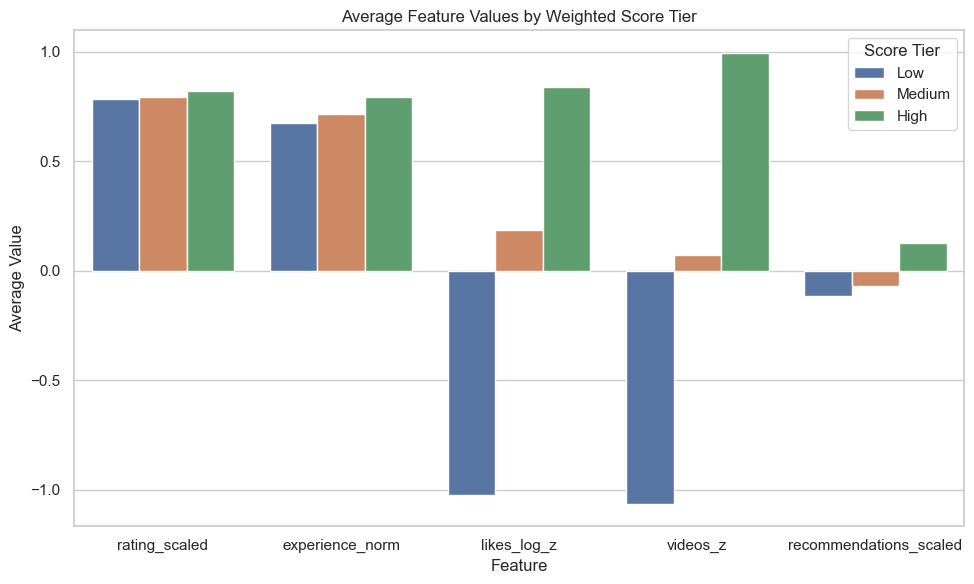

            rating_scaled  experience_norm  likes_log_z  videos_z  \
score_tier                                                          
Low                 0.786            0.675       -1.023    -1.064   
Medium              0.794            0.718        0.186     0.072   
High                0.821            0.794        0.840     0.995   

            recommendations_scaled  
score_tier                          
Low                         -0.115  
Medium                      -0.069  
High                         0.126  


In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Segment trainers into score based tiers: Low, Medium, High 
trainers_df["score_tier"] = pd.qcut(
    trainers_df["weighted_score"], 
    q=3, 
    labels=["Low", "Medium", "High"]
)

# Calculate average feature values per tier
tier_summary = trainers_df.groupby("score_tier")[
    list(weights.keys())
].mean().round(3)


tier_summary_reset = tier_summary.reset_index().melt(
    id_vars="score_tier", 
    var_name="Feature", 
    value_name="Average"
)

# Plot: Bar chart comparing feature values across tiers
plt.figure(figsize=(10, 6))
sns.barplot(data=tier_summary_reset, x="Feature", y="Average", hue="score_tier")
plt.title("Average Feature Values by Weighted Score Tier")
plt.xlabel("Feature")
plt.ylabel("Average Value")
plt.legend(title="Score Tier")
plt.tight_layout()
plt.show()


print(tier_summary)


Content based profile matching 

In [95]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df = pd.read_excel("normalized_trainers.xlsx")
df["specialities"] = df["specialities"].fillna("")

# Clean and tokenize trainer specialities
df["specialities_cleaned"] = (
    df["specialities"]
    .str.lower()
    .str.replace(r"[,&/]", ",", regex=True)
    .str.replace(r"\s+", " ", regex=True)
    .str.replace(" ,", ",")
    .str.replace(", ", ",")
)

# Vectorize trainer specialities
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(","), binary=True)
trainer_vectors = vectorizer.fit_transform(df["specialities_cleaned"])


def match_trainers_to_user_goal(user_goal: str, top_k: int = 10):

    user_goal_cleaned = user_goal.lower().replace(" ", "").replace(",", ",")
    user_vector = vectorizer.transform([user_goal_cleaned])

    # Compute cosine similarity
    similarities = cosine_similarity(user_vector, trainer_vectors).flatten()

    # Attach to DataFrame and return top matches
    df["goal_match_score"] = similarities
    top_matches = df.sort_values(by="goal_match_score", ascending=False).head(top_k)

    return top_matches[["trainer_id", "specialities", "goal_match_score"]]

# Example 

user_selected_goals = "weight loss, flexibility"  

# Call matching function
top_trainers = match_trainers_to_user_goal(user_selected_goals)

# Display 
print(top_trainers)


     trainer_id specialities  goal_match_score
770         771  Flexibility               1.0
793         794  Flexibility               1.0
501         502  Flexibility               1.0
696         697  Flexibility               1.0
121         122  Flexibility               1.0
752         753  Flexibility               1.0
409         410  Flexibility               1.0
338         339  Flexibility               1.0
862         863  Flexibility               1.0
647         648  Flexibility               1.0


/opt/homebrew/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Collaborative filtering 

In [96]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import NearestNeighbors

# Load data
trainers_df = pd.read_excel("PT_Dataset.xlsx")
interactions_df = pd.read_excel("interaction.xlsx")
users_df = pd.read_excel("users.xlsx")

# Goal clusters
goal_clusters = {
    "muscle & strength": {"muscle building", "strength training", "weight lifting", "powerlifting", "crossfit"},
    "weight loss & conditioning": {"weight loss", "hiit", "cardio", "crossfit"},
    "rehabilitation": {"rehabilitation", "injury recovery"},
    "flexibility & wellness": {"flexibility", "mobility", "yoga", "pilates"},
    "elderly fitness": {"elderly fitness"},
    "athletic performance": {"sports-specific", "functional training", "hiit", "cardio"}
}

goal_to_cluster = {goal.lower(): cluster for cluster, goals in goal_clusters.items() for goal in goals}
users_df["goal_cluster"] = users_df["primary_goal"].str.lower().map(goal_to_cluster).fillna("other")

# Encode features
encoder = OneHotEncoder()
goal_encoded = encoder.fit_transform(users_df[["goal_cluster"]]).toarray()
gender_encoded = users_df["gender"].map({"male": 0, "female": 1}).fillna(0).values.reshape(-1, 1)
age_scaled = StandardScaler().fit_transform(users_df[["age"]])
user_features = np.hstack([age_scaled, gender_encoded, goal_encoded])

# Fit k-NN model
knn_model = NearestNeighbors(n_neighbors=10, metric="euclidean")
knn_model.fit(user_features)

# Generate a synthetic new user
def generate_new_user():
    row = users_df.sample(1).iloc[0]
    age_range = (max(18, row["age"] - 5), min(75, row["age"] + 5))
    user_age = random.randint(*age_range) if age_range[0] < age_range[1] else row["age"]
    return {
        "age": user_age,
        "gender": row["gender"],
        "goal": row["primary_goal"],
        "goal_cluster": goal_to_cluster.get(row["primary_goal"].lower(), "other")
    }

# Recommend trainers
def recommend_trainers_for_user(new_user, top_n=15, k=50, debug=False):
    age_value = (new_user["age"] - users_df["age"].mean()) / users_df["age"].std()
    gender_value = 0 if new_user["gender"].lower() == "male" else 1
    goal_vector = encoder.transform([[new_user["goal_cluster"]]]).toarray()
    new_user_vector = np.hstack([[age_value], [gender_value], goal_vector.flatten()]).reshape(1, -1)

    distances, indices = knn_model.kneighbors(new_user_vector, n_neighbors=k)
    
    
    neighbor_ids = users_df.iloc[indices[0]].user_id.tolist()

    # Pull all interactions from those neighbors
    relevant_interactions = interactions_df[interactions_df["user_id"].isin(neighbor_ids)]

    if debug:
        print(f"Neighbors found: {len(neighbor_ids)}")
        print(f"Interactions pulled: {relevant_interactions.shape[0]}")
        print(f"Unique trainers: {relevant_interactions.trainer_id.nunique()}")

    trainer_scores = relevant_interactions.groupby("trainer_id")["engagement_score"] \
        .agg(["mean", "count"]).reset_index() \
        .rename(columns={"mean": "avg_engagement_score", "count": "interaction_count"})

    trainer_scores["final_score"] = trainer_scores["avg_engagement_score"]

    trainer_scores = trainer_scores.sort_values(by="final_score", ascending=False).head(top_n).reset_index(drop=True)

    print(f"\nUser — Gender: {new_user['gender']}, Age: {new_user['age']}, Goal: {new_user['goal']} ({new_user['goal_cluster']})\n")
    return trainer_scores[["trainer_id", "avg_engagement_score", "interaction_count"]]

# Run for sample users
num_users = 10
for i in range(num_users):
    new_user = generate_new_user()
    recommendations = recommend_trainers_for_user(new_user, top_n=10, k=50, debug=True)
    print(recommendations)


Neighbors found: 50
Interactions pulled: 1019
Unique trainers: 624

User — Gender: male, Age: 28, Goal: weight loss (weight loss & conditioning)

   trainer_id  avg_engagement_score  interaction_count
0         998                 0.993                  1
1         647                 0.992                  1
2         549                 0.989                  1
3         234                 0.988                  1
4         275                 0.987                  1
5         624                 0.983                  1
6           7                 0.981                  1
7         749                 0.979                  1
8         511                 0.979                  1
9         398                 0.978                  1
Neighbors found: 50
Interactions pulled: 1038
Unique trainers: 648

User — Gender: male, Age: 56, Goal: flexibility (flexibility & wellness)

   trainer_id  avg_engagement_score  interaction_count
0         277                 0.986                 

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid featur

Hybrid recommender model 

In [97]:
import pandas as pd
import numpy as np
import random
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.neighbors import NearestNeighbors

# Load datasets
trainers_df = pd.read_excel("normalized_trainers.xlsx")
trainers_original = pd.read_excel("PT_Dataset.xlsx")   # original trainer info
interactions_df = pd.read_excel("interaction.xlsx")
users_df = pd.read_excel("users.xlsx")

# Weighted score
trainers_df["experience_norm"] = trainers_df["experience_tier"] / trainers_df["experience_tier"].max()
weighted_score_weights = {
    "rating_scaled": 0.35,
    "experience_norm": 0.25,
    "likes_log_z": 0.15,
    "videos_z": 0.15,
    "recommendations_scaled": 0.10
}
trainers_df["weighted_score"] = (
    weighted_score_weights["rating_scaled"] * trainers_df["rating_scaled"] +
    weighted_score_weights["experience_norm"] * trainers_df["experience_norm"] +
    weighted_score_weights["likes_log_z"] * trainers_df["likes_log_z"] +
    weighted_score_weights["videos_z"] * trainers_df["videos_z"] +
    weighted_score_weights["recommendations_scaled"] * trainers_df["recommendations_scaled"]
)

# Content preprocessing
trainers_df["specialities"] = trainers_df["specialities"].fillna("")
trainers_df["specialities_cleaned"] = (
    trainers_df["specialities"]
    .str.lower()
    .str.replace(r"[,&/]", ",", regex=True)
    .str.replace(r"\s+", " ", regex=True)
    .str.replace(" ,", ",")
    .str.replace(", ", ",")
)
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(","), binary=True)
trainer_vectors = vectorizer.fit_transform(trainers_df["specialities_cleaned"])

# Goal clusters
goal_clusters = {
    "muscle & strength": {"muscle building", "strength training", "weight lifting", "powerlifting", "crossfit"},
    "weight loss & conditioning": {"weight loss", "hiit", "cardio", "crossfit"},
    "rehabilitation": {"rehabilitation", "injury recovery"},
    "flexibility & wellness": {"flexibility", "mobility", "yoga", "pilates"},
    "elderly fitness": {"elderly fitness"},
    "athletic performance": {"sports-specific", "functional training", "hiit", "cardio"}
}
goal_to_cluster = {g.strip().lower(): c for c, gs in goal_clusters.items() for g in gs}
users_df["goal_cluster"] = users_df["primary_goal"].apply(lambda g: goal_to_cluster.get(g.lower(), "other"))

def map_goal_to_cluster(goal):
    return goal_to_cluster.get(goal.strip().lower(), "other")

# k-NN CF setup
encoder = OneHotEncoder()
goal_encoded = encoder.fit_transform(users_df[["goal_cluster"]]).toarray()
gender_encoded = users_df["gender"].map({"male": 0, "female": 1}).fillna(0).values.reshape(-1, 1)
age_scaled = (users_df[["age"]] - users_df["age"].mean()) / users_df["age"].std()
user_features = np.hstack([age_scaled, gender_encoded, goal_encoded])
knn_model = NearestNeighbors(n_neighbors=50, metric="euclidean")
knn_model.fit(user_features)

def generate_new_user():
    row = users_df.sample(1).iloc[0]
    age_range = (max(18, row["age"] - 5), min(75, row["age"] + 5))
    user_age = random.randint(*age_range) if age_range[0] < age_range[1] else row["age"]
    return {
        "age": user_age,
        "gender": row["gender"],
        "goal": row["primary_goal"],
        "goal_cluster": map_goal_to_cluster(row["primary_goal"])
    }

def recommend_trainers_for_user(new_user, top_n=10, k=30):
    # CF
    age_value = (new_user["age"] - users_df["age"].mean()) / users_df["age"].std()
    gender_value = 0 if new_user["gender"].lower() == "male" else 1
    goal_vector = encoder.transform([[new_user["goal_cluster"]]]).toarray()
    new_user_vector = np.hstack([[age_value], [gender_value], goal_vector.flatten()]).reshape(1, -1)

    distances, indices = knn_model.kneighbors(new_user_vector, n_neighbors=k)
    neighbor_ids = users_df.iloc[indices[0]].user_id.tolist()
    relevant_interactions = interactions_df[interactions_df["user_id"].isin(neighbor_ids)]
    trainer_scores_cf = relevant_interactions.groupby("trainer_id")["engagement_score"] \
        .agg(["mean", "count"]).reset_index() \
        .rename(columns={"mean": "cf_score", "count": "interaction_count"})

    # Content
    user_goal = new_user["goal"].lower()
    user_vec = vectorizer.transform([user_goal])
    similarities = cosine_similarity(user_vec, trainer_vectors).flatten()
    trainers_df["content_score"] = similarities

    # Merge engineered features
    merged = trainers_df[["trainer_id", "weighted_score", "content_score"]].copy()
    merged = pd.merge(merged, trainer_scores_cf, on="trainer_id", how="left")
    merged[["weighted_score", "content_score", "cf_score", "interaction_count"]] = merged[["weighted_score", "content_score", "cf_score", "interaction_count"]].fillna(0)

    # Normalize
    scaler = MinMaxScaler()
    merged[["weighted_norm", "content_norm", "cf_norm"]] = scaler.fit_transform(
        merged[["weighted_score", "content_score", "cf_score"]]
    )

    # Final score
    weights = [0.4, 0.4, 0.2]
    merged["final_score"] = (
        weights[0] * merged["weighted_norm"] +
        weights[1] * merged["content_norm"] +
        weights[2] * merged["cf_norm"]
    )

    # Ranking
    final_df = merged.sort_values(by="final_score", ascending=False).head(top_n).reset_index(drop=True)
    final_df["rank"] = np.arange(1, len(final_df) + 1)

    # Merge descriptive attributes from PT_Dataset.xlsx
    final_df = pd.merge(final_df, trainers_original, on="trainer_id", how="left")

    # Select final clean columns
    return final_df[[
        "rank", "trainer_id", "final_score",
        "athlete_rating", "years_experience", "specialities", "total_likes", "workout_recommendations", "videos_count"
    ]]

# Run demo
num_users = 3
for i in range(num_users):
    user = generate_new_user()
    print(f"\nUser Info: {user}")
    result = recommend_trainers_for_user(user, top_n=10, k=30)
    print(result.to_string(index=False))



User Info: {'age': 42, 'gender': 'male', 'goal': 'weight loss', 'goal_cluster': 'weight loss & conditioning'}
 rank  trainer_id  final_score  athlete_rating  years_experience                                      specialities  total_likes  workout_recommendations  videos_count
    1         989     0.849576             3.6                21                                       Weight Loss       284245                       64           404
    2         141     0.815635             3.2                15                                       Weight Loss       143754                      178           401
    3         486     0.803971             4.7                23    Muscle Building, Weight Loss, Prenatal Fitness       204850                      180           488
    4         151     0.794056             4.9                14                    Weight Loss, Strength Training        96267                       93           473
    5         900     0.783473             4.4        

/opt/homebrew/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


Ablation Test

In [98]:
def recommend_with_ablation(new_user, top_n=10, k=30, drop_module=None):
    # Collaborative Filtering (CF)
    age_value = (new_user["age"] - users_df["age"].mean()) / users_df["age"].std()
    gender_value = 0 if new_user["gender"].lower() == "male" else 1
    goal_vector = encoder.transform([[new_user["goal_cluster"]]]).toarray()
    new_user_vector = np.hstack([[age_value], [gender_value], goal_vector.flatten()]).reshape(1, -1)

    distances, indices = knn_model.kneighbors(new_user_vector, n_neighbors=k)
    neighbor_ids = users_df.iloc[indices[0]].user_id.tolist()
    relevant_interactions = interactions_df[interactions_df["user_id"].isin(neighbor_ids)]
    trainer_scores_cf = relevant_interactions.groupby("trainer_id")["engagement_score"] \
        .agg(["mean", "count"]).reset_index() \
        .rename(columns={"mean": "cf_score", "count": "interaction_count"})

    #Content Filtering
    user_goal = new_user["goal"].lower()
    user_vec = vectorizer.transform([user_goal])
    similarities = cosine_similarity(user_vec, trainer_vectors).flatten()
    trainers_df["content_score"] = similarities

    #  Merge engineered features 
    merged = trainers_df[["trainer_id", "weighted_score", "content_score"]].copy()
    merged = pd.merge(merged, trainer_scores_cf, on="trainer_id", how="left")
    merged[["weighted_score", "content_score", "cf_score", "interaction_count"]] = \
        merged[["weighted_score", "content_score", "cf_score", "interaction_count"]].fillna(0)

    # Normalise all three
    scaler = MinMaxScaler()
    merged[["weighted_norm", "content_norm", "cf_norm"]] = scaler.fit_transform(
        merged[["weighted_score", "content_score", "cf_score"]]
    )

    # Apply ablation by zeroing out one module
    if drop_module == "weighted":
        merged["weighted_norm"] = 0
    elif drop_module == "content":
        merged["content_norm"] = 0
    elif drop_module == "cf":
        merged["cf_norm"] = 0

    
    weights = [0.4, 0.4, 0.2]

    merged["final_score"] = (
        weights[0] * merged["weighted_norm"] +
        weights[1] * merged["content_norm"] +
        weights[2] * merged["cf_norm"]
    )

    final_df = merged.sort_values(by="final_score", ascending=False).head(top_n).reset_index(drop=True)
    final_df["rank"] = np.arange(1, len(final_df) + 1)

    final_df = pd.merge(final_df, trainers_original, on="trainer_id", how="left")

    return final_df[[
        "rank", "trainer_id", "final_score",
        "athlete_rating", "years_experience", "specialities",
        "total_likes", "workout_recommendations", "videos_count"
    ]]


In [99]:
# Define the two users
user_weightloss = {"age": 28, "gender": "male", "goal": "weight loss", "goal_cluster": "weight loss & conditioning"}
user_rehab = {"age": 68, "gender": "female", "goal": "rehabilitation", "goal_cluster": "rehabilitation"}

# Weight loss user
print("Original Hybrid - Weight Loss")
print(recommend_with_ablation(user_weightloss, drop_module=None).to_string(index=False))

print("\nDrop Weighted - Weight Loss")
print(recommend_with_ablation(user_weightloss, drop_module="weighted").to_string(index=False))

print("\nDrop Content - Weight Loss")
print(recommend_with_ablation(user_weightloss, drop_module="content").to_string(index=False))

print("\nDrop CF - Weight Loss")
print(recommend_with_ablation(user_weightloss, drop_module="cf").to_string(index=False))

# Rehab user
print("\nOriginal Hybrid - Rehabilitation")
print(recommend_with_ablation(user_rehab, drop_module=None).to_string(index=False))

print("\nDrop Weighted - Rehabilitation")
print(recommend_with_ablation(user_rehab, drop_module="weighted").to_string(index=False))

print("\nDrop Content - Rehabilitation")
print(recommend_with_ablation(user_rehab, drop_module="content").to_string(index=False))

print("\nDrop CF - Rehabilitation")
print(recommend_with_ablation(user_rehab, drop_module="cf").to_string(index=False))


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid featur

Original Hybrid - Weight Loss
 rank  trainer_id  final_score  athlete_rating  years_experience                                  specialities  total_likes  workout_recommendations  videos_count
    1         536     0.855197             4.1                 8                                   Weight Loss       276197                      132           314
    2         813     0.782630             4.6                 5 Prenatal Fitness, Rehabilitation, Weight Loss       331996                      196           464
    3         989     0.773842             3.6                21                                   Weight Loss       284245                       64           404
    4         141     0.767439             3.2                15                                   Weight Loss       143754                      178           401
    5          90     0.747019             3.8                13                                   Weight Loss       151667                      151       

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


    Evaluation 
    1. Weighted scoring model 

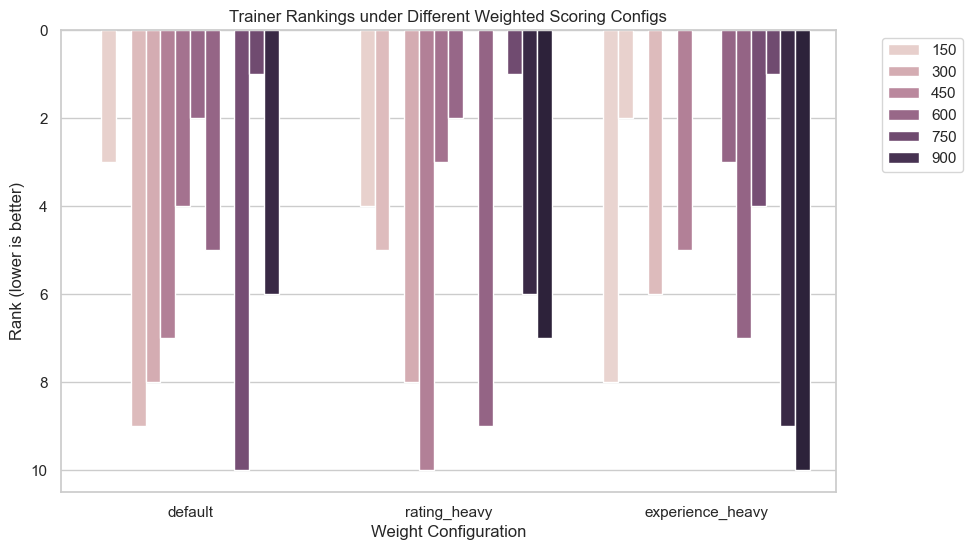

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

def test_weighted_scoring(trainers_df, weight_sets, top_n=10):
    
    results = []
    for label, weights in weight_sets.items():
        # compute new weighted score
        trainers_df[f"score_{label}"] = (
            weights["rating_scaled"] * trainers_df["rating_scaled"] +
            weights["experience_norm"] * trainers_df["experience_norm"] +
            weights["likes_log_z"] * trainers_df["likes_log_z"] +
            weights["videos_z"] * trainers_df["videos_z"] +
            weights["recommendations_scaled"] * trainers_df["recommendations_scaled"]
        )
        # get top trainers for this config
        top_trainers = trainers_df.sort_values(f"score_{label}", ascending=False).head(top_n)
        for rank, row in enumerate(top_trainers.itertuples(), start=1):
            results.append({
                "config": label,
                "trainer_id": row.trainer_id,
                "name": row.name if "name" in trainers_df.columns else row.trainer_id,
                "rank": rank,
                "score": getattr(row, f"score_{label}")
            })
    return pd.DataFrame(results)

# Example weight configs to test
weight_sets = {
    "default": {
        "rating_scaled": 0.35,
        "experience_norm": 0.25,
        "likes_log_z": 0.15,
        "videos_z": 0.15,
        "recommendations_scaled": 0.10
    },
    "rating_heavy": {
        "rating_scaled": 0.50,
        "experience_norm": 0.15,
        "likes_log_z": 0.15,
        "videos_z": 0.10,
        "recommendations_scaled": 0.10
    },
    "experience_heavy": {
        "rating_scaled": 0.20,
        "experience_norm": 0.50,
        "likes_log_z": 0.10,
        "videos_z": 0.10,
        "recommendations_scaled": 0.10
    }
}

results_df = test_weighted_scoring(trainers_df, weight_sets, top_n=10)

# Plot rank positions across configs
plt.figure(figsize=(10,6))
sns.barplot(data=results_df, x="config", y="rank", hue="name")
plt.gca().invert_yaxis()  # rank 1 at top
plt.title("Trainer Rankings under Different Weighted Scoring Configs")
plt.ylabel("Rank (lower is better)")
plt.xlabel("Weight Configuration")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


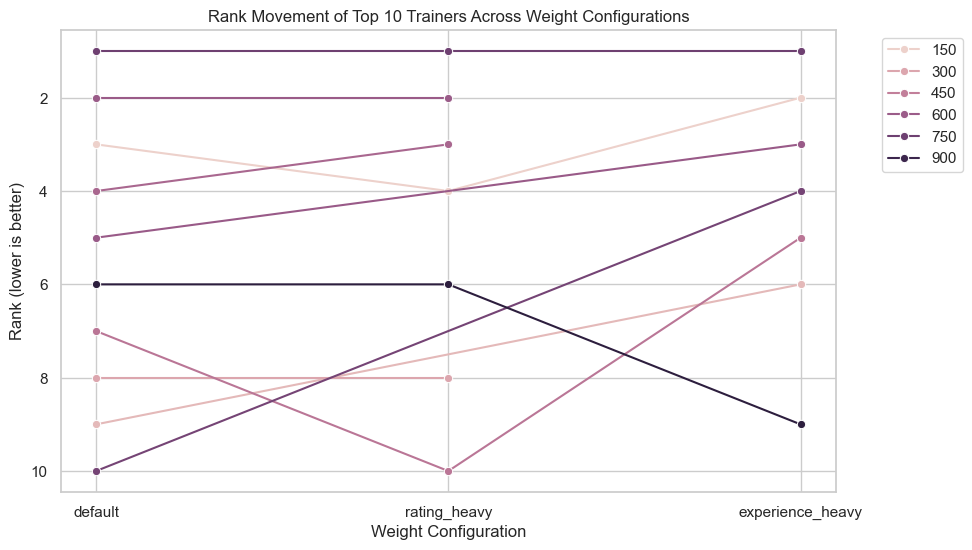

In [101]:
# Pick the top 10 trainers in the default config
top_default = (
    results_df[results_df["config"] == "default"]
    .sort_values("rank")
    .head(10)["trainer_id"]
    .tolist()
)

# Filter only those trainers from results
plot_df = results_df[results_df["trainer_id"].isin(top_default)]

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=plot_df, 
    x="config", 
    y="rank", 
    hue="name", 
    marker="o"
)
plt.gca().invert_yaxis()  # rank 1 at top
plt.title("Rank Movement of Top 10 Trainers Across Weight Configurations")
plt.ylabel("Rank (lower is better)")
plt.xlabel("Weight Configuration")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


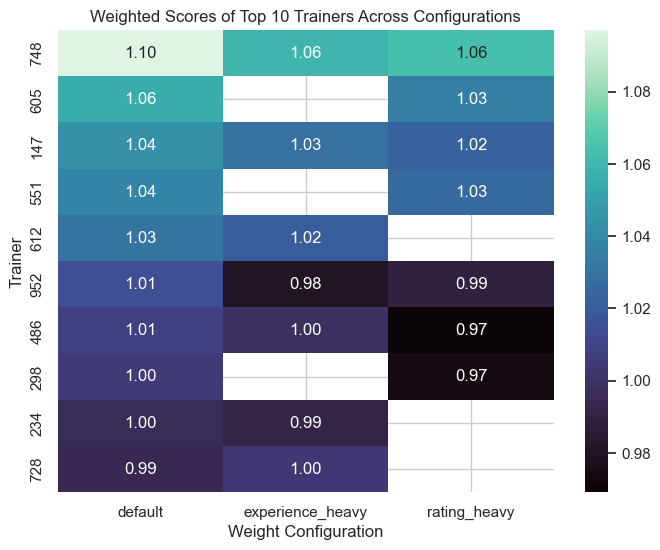

In [102]:

heatmap_df = results_df.pivot_table(
    index="name", 
    columns="config", 
    values="score"
).loc[top_default]  

plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_df, 
    annot=True, 
    fmt=".2f", 
    cmap="mako"
)
plt.title("Weighted Scores of Top 10 Trainers Across Configurations")
plt.ylabel("Trainer")
plt.xlabel("Weight Configuration")
plt.show()


2. Content based profile matching


User goal: rehabilitation


,trainer_id,specialities,content_score
330,331,Rehabilitation,1.0
578,579,Rehabilitation,1.0
843,844,Rehabilitation,1.0
979,980,Rehabilitation,1.0
180,181,Rehabilitation,1.0



User goal: strength training


,trainer_id,specialities,content_score
648,649,Strength Training,1.0
194,195,Strength Training,1.0
161,162,Strength Training,1.0
693,694,Strength Training,1.0
609,610,Strength Training,1.0



User goal: weight loss


,trainer_id,specialities,content_score
759,760,Weight Loss,1.0
713,714,Weight Loss,1.0
89,90,Weight Loss,1.0
382,383,Weight Loss,1.0
178,179,Weight Loss,1.0


/var/folders/n3/sn521v9903dbc_0wr7wh55c40000gn/T/ipykernel_1320/782730669.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_trainers, x="content_score", y="trainer_id", palette="Blues_r")


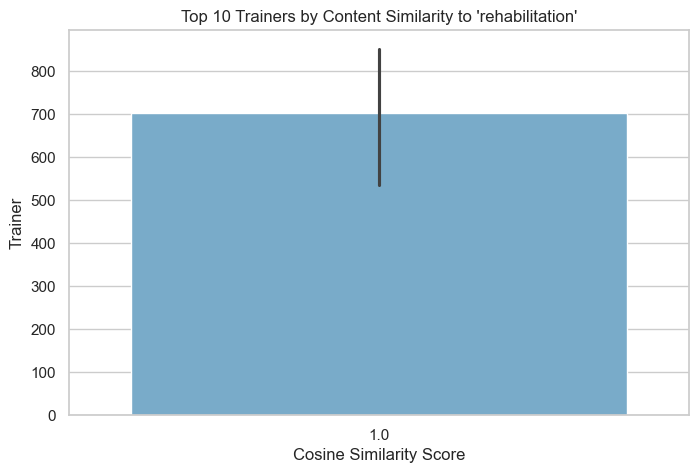

User goal: wellness (failure test)


,trainer_id,specialities,content_score
0,1,"Prenatal Fitness, Yoga",0.0
671,672,"CrossFit, Weight Loss",0.0
658,659,Powerlifting,0.0
659,660,"Prenatal Fitness, CrossFit, Yoga",0.0
660,661,"Weight Loss, HIIT, Pilates",0.0


In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

# 1. Test function
def test_content_based(user_goal, top_n=10):
    
    user_vec = vectorizer.transform([user_goal.lower()])
    similarities = cosine_similarity(user_vec, trainer_vectors).flatten()
    
    trainers_df["content_score"] = similarities
    top_trainers = trainers_df.sort_values("content_score", ascending=False).head(top_n)
    
    return top_trainers[["trainer_id", "specialities", "content_score"]]

# 2. Run tests on common user goals
test_goals = ["rehabilitation", "strength training", "weight loss"]

for goal in test_goals:
    print(f"\nUser goal: {goal}")
    display(test_content_based(goal, top_n=5))

# 3. Example 
goal = "rehabilitation"  
user_vec = vectorizer.transform([goal.lower()])
similarities = cosine_similarity(user_vec, trainer_vectors).flatten()

trainers_df["content_score"] = similarities
top_trainers = trainers_df.sort_values("content_score", ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(data=top_trainers, x="content_score", y="trainer_id", palette="Blues_r")
plt.title(f"Top 10 Trainers by Content Similarity to '{goal}'")
plt.xlabel("Cosine Similarity Score")
plt.ylabel("Trainer")
plt.show()

# 4. Failure case: vague or uncommon goal
vague_goal = "wellness"
print(f"User goal: {vague_goal} (failure test)")
display(test_content_based(vague_goal, top_n=5))


3. Collaborative filtering

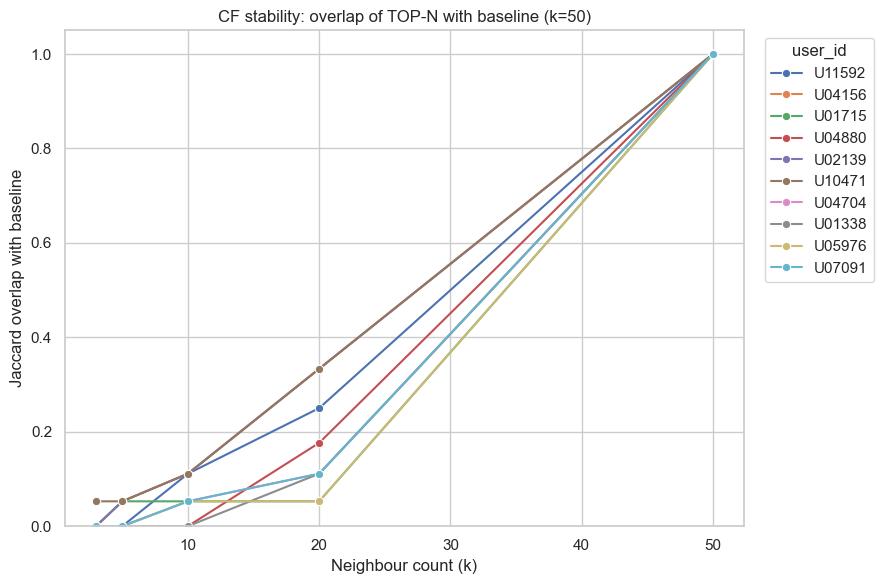

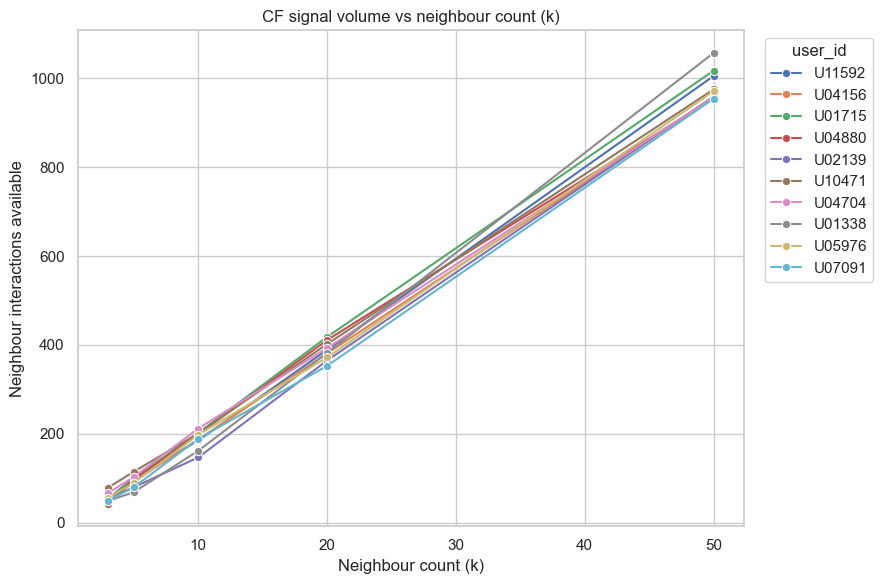

In [ ]:
# 4.2.3 COLLABORATIVE FILTERING FUNCTIONAL & FAILURE TESTS
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import NearestNeighbors

# 0) Prep user feature matrix
users_df = users_df.copy()

# Ensure goal_cluster exists
if "goal_cluster" not in users_df.columns:
    users_df["goal_cluster"] = users_df["primary_goal"].astype(str).str.lower()

# Encode gender
users_df["gender_code"] = users_df["gender"].astype(str).str.lower().map({"male":0, "female":1}).fillna(0)

# Scale age
age_mu, age_sigma = users_df["age"].mean(), users_df["age"].std()
users_df["age_scaled"] = (users_df["age"] - age_mu) / (age_sigma if age_sigma != 0 else 1)

# One-hot encode goal_cluster
enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
goal_ohe = enc.fit_transform(users_df[["goal_cluster"]])

# Build feature matrix (age, gender, goals)
X_users = np.hstack([
    users_df[["age_scaled", "gender_code"]].to_numpy(),
    goal_ohe
])
user_index = pd.Series(range(len(users_df)), index=users_df["user_id"])

# Useful constants
K_VALUES = [3, 5, 10, 20, 50]
TOP_N = 10
BASELINE_K = 50

# helpers
def build_knn(metric="euclidean"):
    k_max = min(len(users_df), max(K_VALUES))
    model = NearestNeighbors(n_neighbors=k_max, metric=metric)
    model.fit(X_users)
    return model

def user_vector_from_id(uid):
    idx = int(user_index.loc[uid])
    return X_users[idx:idx+1, :]

def cf_scores_for_user(uid, k=20, metric="euclidean", interactions_source=None):
    if interactions_source is None:
        interactions_source = interactions_df
    knn = build_knn(metric=metric)
    vec = user_vector_from_id(uid)
    dists, inds = knn.kneighbors(vec, n_neighbors=min(k, len(users_df)))
    neigh_idxs = inds[0].tolist()
    self_idx = int(user_index.loc[uid])
    if self_idx in neigh_idxs:
        neigh_idxs.remove(self_idx)
    neighbour_ids = users_df.iloc[neigh_idxs]["user_id"].tolist()
    neigh_inter = interactions_source[interactions_source["user_id"].isin(neighbour_ids)]
    neighbour_interactions_count = len(neigh_inter)
    trainer_scores = (
        neigh_inter.groupby("trainer_id")["engagement_score"]
        .agg(["mean", "count"])
        .reset_index()
        .rename(columns={"mean":"cf_score", "count":"interaction_count"})
        .sort_values("cf_score", ascending=False)
    )
    topN = trainer_scores.head(TOP_N).reset_index(drop=True)
    return topN, neighbour_ids, neighbour_interactions_count

def jaccard(a, b):
    a, b = set(a), set(b)
    if not a and not b:
        return 1.0
    return len(a & b) / max(1, len(a | b))

# A) k-sweep: stability vs baseline
def k_sweep_stability(eval_user_ids, k_values=K_VALUES, baseline_k=BASELINE_K, metric="euclidean"):
    rows = []
    baseline_lists = {}
    for uid in eval_user_ids:
        base_df, _, _ = cf_scores_for_user(uid, k=baseline_k, metric=metric)
        baseline_lists[uid] = base_df["trainer_id"].tolist()
    for uid in eval_user_ids:
        for k in k_values:
            df_k, _, sig_cnt = cf_scores_for_user(uid, k=k, metric=metric)
            rec_k = df_k["trainer_id"].tolist()
            overlap = jaccard(rec_k, baseline_lists[uid])
            rows.append({
                "user_id": uid,
                "k": k,
                "overlap_with_baseline": overlap,
                "neighbour_interactions": sig_cnt,
                "goal_cluster": users_df.loc[users_df["user_id"] == uid, "goal_cluster"].values[0]
            })
    return pd.DataFrame(rows)

def pick_eval_users(n_per_goal=2, max_users=10):
    out = []
    for gc, grp in users_df.groupby("goal_cluster"):
        sample = grp.sample(min(n_per_goal, len(grp)), random_state=42)["user_id"].tolist()
        out.extend(sample)
    if len(out) > max_users:
        out = out[:max_users]
    if len(out) == 0:
        out = users_df.sample(min(5, len(users_df)), random_state=42)["user_id"].tolist()
    return out

eval_users = pick_eval_users()
stability_df = k_sweep_stability(eval_users)

# Plot stability
plt.figure(figsize=(9,6))
sns.lineplot(data=stability_df, x="k", y="overlap_with_baseline", hue="user_id", marker="o")
plt.ylim(0,1.05)
plt.title("CF stability: overlap of TOP-N with baseline (k=50)")
plt.xlabel("Neighbour count (k)")
plt.ylabel("Jaccard overlap with baseline")
plt.legend(title="user_id", bbox_to_anchor=(1.02,1), loc="upper left")
plt.tight_layout()
plt.savefig("cf_k_sweep_overlap.png", dpi=300)
plt.show()

# Plot signal volume
plt.figure(figsize=(9,6))
sns.lineplot(data=stability_df, x="k", y="neighbour_interactions", hue="user_id", marker="o")
plt.title("CF signal volume vs neighbour count (k)")
plt.xlabel("Neighbour count (k)")
plt.ylabel("Neighbour interactions available")
plt.legend(title="user_id", bbox_to_anchor=(1.02,1), loc="upper left")
plt.tight_layout()
plt.savefig("cf_k_sweep_signal.png", dpi=300)
plt.show()

# B) metric comparison: euclidean vs cosine
def metric_comparison(uid, k=20):
    knn_euc = build_knn(metric="euclidean")
    _, i_eu = knn_euc.kneighbors(user_vector_from_id(uid), n_neighbors=min(k, len(users_df)))
    idx_eu = list(i_eu[0])
    if int(user_index.loc[uid]) in idx_eu: idx_eu.remove(int(user_index.loc[uid]))
    neigh_eu = users_df.iloc[idx_eu]["user_id"].tolist()

    knn_cos = build_knn(metric="cosine")
    _, i_co = knn_cos.kneighbors(user_vector_from_id(uid), n_neighbors=min(k, len(users_df)))
    idx_co = list(i_co[0])
    if int(user_index.loc[uid]) in idx_co: idx_co.remove(int(user_index.loc[uid]))
    neigh_co = users_df.iloc[idx_co]["user_id"].tolist()

    neigh_overlap = jaccard(neigh_eu, neigh_co)
    rec_eu, _, _ = cf_scores_for_user(uid, k=k, metric="euclidean")
    rec_co, _, _ = cf_scores_for_user(uid, k=k, metric="cosine")
    rec_overlap = jaccard(rec_eu["trainer_id"].tolist(), rec_co["trainer_id"].tolist())

    return {"user_id": uid, "k": k, "neighbour_overlap": neigh_overlap, "rec_overlap": rec_overlap}

metric_rows = [metric_comparison(uid, k=20) for uid in eval_users[:6]]



4. Hybrid recommender system

/opt/homebrew/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have 


=== User 1 Info ===
 {'age': 36, 'gender': 'female', 'goal': 'muscle building', 'goal_cluster': 'muscle & strength'}

--- Hybrid run with weights [0.3, 0.2, 0.5] ---
   rank  trainer_id  final_score  athlete_rating  years_experience  \
0     1         559     0.878461             3.4                24   
1     2         872     0.850992             3.8                 1   
2     3         423     0.809242             4.2                 3   
3     4         132     0.778816             3.2                22   
4     5         311     0.759954             4.3                 4   
5     6          42     0.759537             4.7                17   
6     7          37     0.738646             3.7                22   
7     8         481     0.737806             4.6                17   
8     9         312     0.737701             3.8                21   
9    10         558     0.736736             3.9                24   

                                        specialities  interact

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid featur

   rank  trainer_id  final_score  athlete_rating  years_experience  \
0     1         120     0.466869             5.0                11   
1     2          95     0.456092             4.9                 3   
2     3         612     0.429340             3.6                23   
3     4         291     0.420211             3.3                 5   
4     5          12     0.412486             5.0                24   
5     6         231     0.411162             3.7                17   
6     7         444     0.409762             4.6                15   
7     8         997     0.409435             3.2                 5   
8     9         471     0.396974             4.1                19   
9    10         137     0.394308             4.7                18   

                specialities  interaction_count  
0                       Yoga                0.0  
1                       Yoga                0.0  
2  Yoga, Functional Training                0.0  
3                       Yoga 

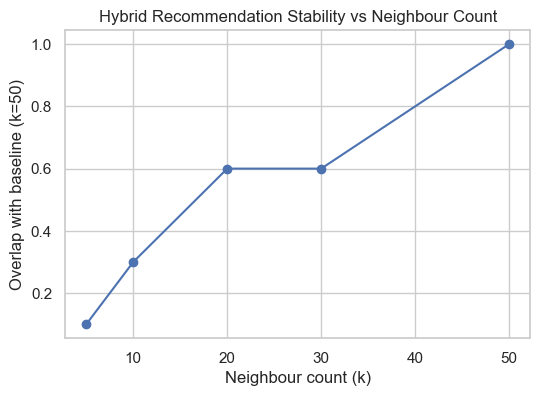

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


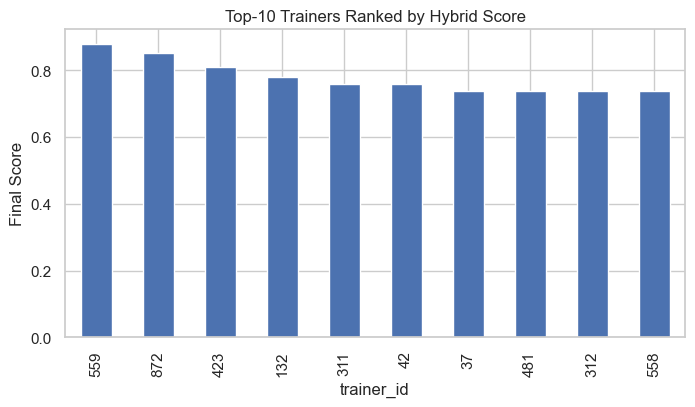

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid featur

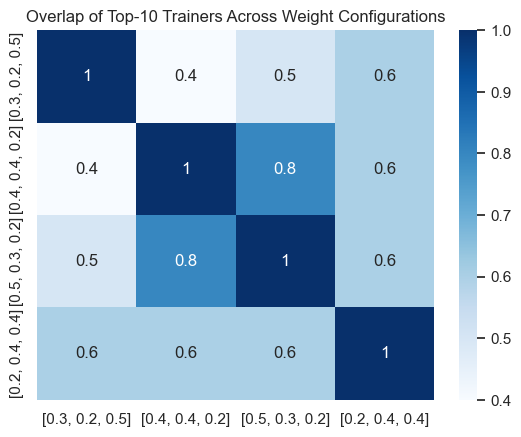

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.neighbors import NearestNeighbors

# Load datasets
trainers_df = pd.read_excel("normalized_trainers.xlsx")
trainers_original = pd.read_excel("PT_Dataset.xlsx")
interactions_df = pd.read_excel("interaction.xlsx")
users_df = pd.read_excel("users.xlsx")

# Weighted scoring
trainers_df["experience_norm"] = trainers_df["experience_tier"] / trainers_df["experience_tier"].max()
weighted_score_weights = {
    "rating_scaled": 0.35,
    "experience_norm": 0.25,
    "likes_log_z": 0.15,
    "videos_z": 0.15,
    "recommendations_scaled": 0.10
}
trainers_df["weighted_score"] = (
    weighted_score_weights["rating_scaled"] * trainers_df["rating_scaled"] +
    weighted_score_weights["experience_norm"] * trainers_df["experience_norm"] +
    weighted_score_weights["likes_log_z"] * trainers_df["likes_log_z"] +
    weighted_score_weights["videos_z"] * trainers_df["videos_z"] +
    weighted_score_weights["recommendations_scaled"] * trainers_df["recommendations_scaled"]
)

# Content preprocessing
trainers_df["specialities"] = trainers_df["specialities"].fillna("")
trainers_df["specialities_cleaned"] = (
    trainers_df["specialities"]
    .str.lower()
    .str.replace(r"[,&/]", ",", regex=True)
    .str.replace(r"\s+", " ", regex=True)
    .str.replace(" ,", ",")
    .str.replace(", ", ",")
)
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(","), binary=True)
trainer_vectors = vectorizer.fit_transform(trainers_df["specialities_cleaned"])

# Goal clusters
goal_clusters = {
    "muscle & strength": {"muscle building", "strength training", "weight lifting", "powerlifting", "crossfit"},
    "weight loss & conditioning": {"weight loss", "hiit", "cardio", "crossfit"},
    "rehabilitation": {"rehabilitation", "injury recovery"},
    "flexibility & wellness": {"flexibility", "mobility", "yoga", "pilates"},
    "elderly fitness": {"elderly fitness"},
    "athletic performance": {"sports-specific", "functional training", "hiit", "cardio"}
}
goal_to_cluster = {g.strip().lower(): c for c, gs in goal_clusters.items() for g in gs}
users_df["goal_cluster"] = users_df["primary_goal"].apply(lambda g: goal_to_cluster.get(str(g).lower(), "other"))

def map_goal_to_cluster(goal):
    return goal_to_cluster.get(str(goal).strip().lower(), "other")

# User feature encoding for CF
encoder = OneHotEncoder()
goal_encoded = encoder.fit_transform(users_df[["goal_cluster"]]).toarray()
gender_encoded = users_df["gender"].map({"male": 0, "female": 1}).fillna(0).values.reshape(-1, 1)
age_scaled = (users_df[["age"]] - users_df["age"].mean()) / users_df["age"].std()
user_features = np.hstack([age_scaled, gender_encoded, goal_encoded])

knn_model = NearestNeighbors(n_neighbors=50, metric="euclidean")
knn_model.fit(user_features)

# Hybrid recommendation function
def recommend_trainers_for_user(new_user, top_n=10, k=30, weights=[0.3,0.2,0.5], ablation=None):
    age_value = (new_user["age"] - users_df["age"].mean()) / users_df["age"].std()
    gender_value = 0 if new_user["gender"].lower() == "male" else 1
    goal_vector = encoder.transform([[new_user["goal_cluster"]]]).toarray()
    new_user_vector = np.hstack([[age_value], [gender_value], goal_vector.flatten()]).reshape(1, -1)

    distances, indices = knn_model.kneighbors(new_user_vector, n_neighbors=k)
    neighbor_ids = users_df.iloc[indices[0]].user_id.tolist()
    relevant_interactions = interactions_df[interactions_df["user_id"].isin(neighbor_ids)]
    trainer_scores_cf = relevant_interactions.groupby("trainer_id")["engagement_score"] \
        .agg(["mean", "count"]).reset_index() \
        .rename(columns={"mean": "cf_score", "count": "interaction_count"})

    user_goal = new_user["goal"].lower()
    user_vec = vectorizer.transform([user_goal])
    similarities = cosine_similarity(user_vec, trainer_vectors).flatten()
    trainers_df["content_score"] = similarities

    merged = trainers_df[["trainer_id", "weighted_score", "content_score"]].copy()
    merged = pd.merge(merged, trainer_scores_cf, on="trainer_id", how="left")
    merged[["weighted_score", "content_score", "cf_score", "interaction_count"]] = \
        merged[["weighted_score", "content_score", "cf_score", "interaction_count"]].fillna(0)

    scaler = MinMaxScaler()
    merged[["weighted_norm", "content_norm", "cf_norm"]] = scaler.fit_transform(
        merged[["weighted_score", "content_score", "cf_score"]]
    )

    if ablation == "weighted":
        weights = [0, weights[1], weights[2]]
    elif ablation == "content":
        weights = [weights[0], 0, weights[2]]
    elif ablation == "cf":
        weights = [weights[0], weights[1], 0]

    merged["final_score"] = (
        weights[0] * merged["weighted_norm"] +
        weights[1] * merged["content_norm"] +
        weights[2] * merged["cf_norm"]
    )

    final_df = merged.sort_values(by="final_score", ascending=False).head(top_n).reset_index(drop=True)
    final_df["rank"] = np.arange(1, len(final_df) + 1)
    final_df = pd.merge(final_df, trainers_original, on="trainer_id", how="left")

    return final_df[["rank", "trainer_id", "final_score",
                     "athlete_rating", "years_experience", "specialities", "interaction_count"]]

# Generate random users
def generate_new_user():
    row = users_df.sample(1).iloc[0]
    age_range = (max(18, row["age"] - 5), min(75, row["age"] + 5))
    user_age = random.randint(*age_range) if age_range[0] < age_range[1] else row["age"]
    return {
        "age": user_age,
        "gender": row["gender"],
        "goal": row["primary_goal"],
        "goal_cluster": map_goal_to_cluster(row["primary_goal"])
    }

# Evaluation Experiments

# 1. Different weights for same users
weight_sets = [[0.3,0.2,0.5], [0.4,0.4,0.2], [0.5,0.3,0.2], [0.2,0.4,0.4]]
users = [generate_new_user() for _ in range(2)]

for i, user in enumerate(users, 1):
    print(f"\n=== User {i} Info ===\n", user)
    for w in weight_sets:
        print(f"\n--- Hybrid run with weights {w} ---")
        res = recommend_trainers_for_user(user, weights=w, k=30)
        print(res)

# 2. Ablation study
for i, user in enumerate(users, 1):
    for module in ["weighted", "content", "cf"]:
        print(f"\n--- Ablation: Dropping {module} for User {i} ---")
        res = recommend_trainers_for_user(user, ablation=module, k=30)
        print(res)

# 3. Vary k to see stability
k_values = [5, 10, 20, 30, 50]
overlap_scores = []
for k in k_values:
    res = recommend_trainers_for_user(users[0], k=k)
    top_ids = res["trainer_id"].tolist()
    overlap_scores.append((k, top_ids))

baseline = set(overlap_scores[-1][1])
stability = [(k, len(set(ids) & baseline)/len(baseline)) for k, ids in overlap_scores]

plt.figure(figsize=(6,4))
ks, overlaps = zip(*stability)
plt.plot(ks, overlaps, marker="o")
plt.xlabel("Neighbour count (k)")
plt.ylabel("Overlap with baseline (k=50)")
plt.title("Hybrid Recommendation Stability vs Neighbour Count")
plt.show()

# 4. Contribution analysis (bar chart of final scores)
user = users[0]
res = recommend_trainers_for_user(user, weights=[0.3,0.2,0.5])
res_plot = res.copy()
res_plot.set_index("trainer_id")[["final_score"]].head(10).plot(kind="bar", figsize=(8,4), legend=False)
plt.ylabel("Final Score")
plt.title("Top-10 Trainers Ranked by Hybrid Score")
plt.show()

# 5. Overlap heatmap between weight sets
from itertools import combinations
import seaborn as sns

overlap_matrix = pd.DataFrame(index=[str(w) for w in weight_sets], columns=[str(w) for w in weight_sets])
for w1, w2 in combinations(weight_sets, 2):
    ids1 = set(recommend_trainers_for_user(users[0], weights=w1)["trainer_id"].tolist())
    ids2 = set(recommend_trainers_for_user(users[0], weights=w2)["trainer_id"].tolist())
    overlap = len(ids1 & ids2) / len(ids1)
    overlap_matrix.loc[str(w1), str(w2)] = overlap
    overlap_matrix.loc[str(w2), str(w1)] = overlap
np.fill_diagonal(overlap_matrix.values, 1.0)
sns.heatmap(overlap_matrix.astype(float), annot=True, cmap="Blues")
plt.title("Overlap of Top-10 Trainers Across Weight Configurations")
plt.show()



=== User Info ===
 {'age': 33, 'gender': 'male', 'goal': 'weight loss', 'goal_cluster': 'weight loss & conditioning'}

--- Rank shifts across different weight sets ---
           [0.3, 0.2, 0.5] [0.4, 0.4, 0.2] [0.5, 0.3, 0.2] [0.2, 0.4, 0.4]
trainer_id                                                                
989                    1.0             1.0             1.0             1.0
477                    2.0               -            10.0             3.0
366                    3.0             4.0             4.0             5.0
234                    4.0               -               -               -
645                    5.0               -               -               -
186                    6.0               -               -             7.0
952                    7.0             5.0             3.0             9.0
298                    8.0               -               -               -
636                    9.0               -               -               -
385   

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


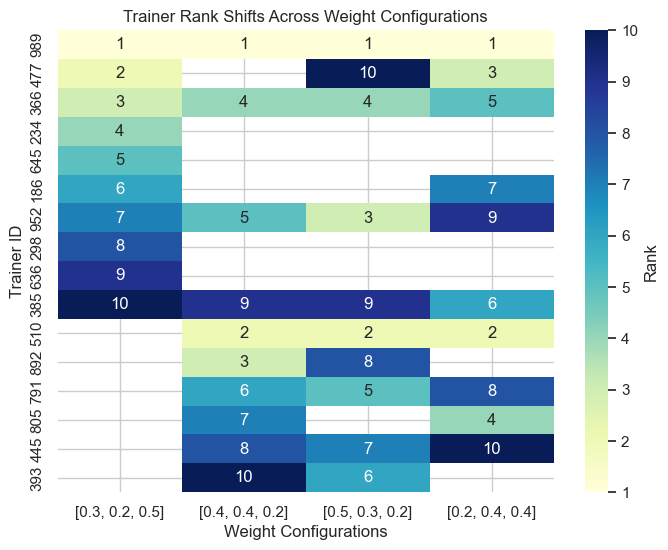

In [ ]:
def compare_rank_shifts(user, weight_sets, top_n=10, k=30):
    
    results = {}
    for w in weight_sets:
        res = recommend_trainers_for_user(user, weights=w, k=k, top_n=top_n)
        ranks = dict(zip(res["trainer_id"], res["rank"]))
        results[str(w)] = ranks

    # Combine into a dataframe
    rank_df = pd.DataFrame(results).fillna("-")
    rank_df.index.name = "trainer_id"

    # Show trainers that appear in at least one config
    return rank_df

# Example usage with one user
user = generate_new_user()
print("\n=== User Info ===\n", user)

rank_shifts = compare_rank_shifts(user, weight_sets, top_n=10, k=30)
print("\n--- Rank shifts across different weight sets ---")
print(rank_shifts)

# Visualise rank shifts as heatmap
plt.figure(figsize=(8,6))
sns.heatmap(rank_shifts.replace("-", np.nan).astype(float), annot=True, cmap="YlGnBu", cbar_kws={'label': 'Rank'})
plt.title("Trainer Rank Shifts Across Weight Configurations")
plt.ylabel("Trainer ID")
plt.xlabel("Weight Configurations")
plt.show()


Precision and recall and ndcg

In [ ]:
def ndcg_at_k(recommended, relevant, k=10):
   
    dcg = 0.0
    for i, item in enumerate(recommended[:k], start=1):
        if item in relevant:
            dcg += 1 / np.log2(i + 1)

    # Ideal DCG
    ideal_hits = min(len(relevant), k)
    idcg = sum(1 / np.log2(i + 1) for i in range(1, ideal_hits + 1))

    return dcg / idcg if idcg > 0 else 0.0


def evaluate_weight_configs_multiN(users_df, interactions_df, weight_configs,
                                   cutoffs=[5, 10, 20], test_size=0.2, k=30, sample_users=None):
    

    # Train/test split
    train_interactions, test_interactions = train_test_split(
        interactions_df, test_size=test_size, random_state=42
    )

    # Precompute content similarities per goal cluster
    goal_to_content = {}
    for goal in users_df["goal_cluster"].unique():
        user_vec = vectorizer.transform([goal])
        similarities = cosine_similarity(user_vec, trainer_vectors).flatten()
        goal_to_content[goal] = similarities

    # Renormalise weighted scores
    scaler_w = MinMaxScaler()
    trainers_df["weighted_norm"] = scaler_w.fit_transform(trainers_df[["weighted_score"]])

    # Recommender with custom weights
    def recommend_with_weights(user, weights, top_n=10, k=30):
        # CF using train interactions
        age_value = (user["age"] - users_df["age"].mean()) / users_df["age"].std()
        gender_value = 0 if user["gender"].lower() == "male" else 1
        goal_vector = encoder.transform(pd.DataFrame([[user["goal_cluster"]]], columns=["goal_cluster"])).toarray()
        new_user_vector = np.hstack([[age_value], [gender_value], goal_vector.flatten()]).reshape(1, -1)

        distances, indices = knn_model.kneighbors(new_user_vector, n_neighbors=k)
        neighbor_ids = users_df.iloc[indices[0]].user_id.tolist()
        relevant_interactions = train_interactions[train_interactions["user_id"].isin(neighbor_ids)]
        trainer_scores_cf = relevant_interactions.groupby("trainer_id")["engagement_score"] \
            .agg(["mean", "count"]).reset_index() \
            .rename(columns={"mean": "cf_score", "count": "interaction_count"})

        # Content
        similarities = goal_to_content.get(user["goal_cluster"], np.zeros(len(trainers_df)))
        trainers_df["content_score"] = similarities

        merged = trainers_df[["trainer_id", "weighted_norm", "content_score"]].copy()
        merged = pd.merge(merged, trainer_scores_cf, on="trainer_id", how="left")
        merged[["content_score", "cf_score", "interaction_count"]] = \
            merged[["content_score", "cf_score", "interaction_count"]].fillna(0)

        # Normalise content & CF fresh
        scaler = MinMaxScaler()
        merged[["content_norm", "cf_norm"]] = scaler.fit_transform(
            merged[["content_score", "cf_score"]]
        )

        # Final score
        merged["final_score"] = (
            weights[0] * merged["weighted_norm"] +
            weights[1] * merged["content_norm"] +
            weights[2] * merged["cf_norm"]
        )

        return merged.sort_values(by="final_score", ascending=False).head(top_n)["trainer_id"].tolist()

    #Evaluate all configs and cutoffs
    results = []
    test_users = test_interactions["user_id"].unique()
    if sample_users:
        test_users = np.random.choice(test_users, size=min(sample_users, len(test_users)), replace=False)

    for name, weights in weight_configs.items():
        for N in cutoffs:
            precisions, recalls, ndcgs = [], [], []
            all_recommended_trainers = set()
            users_with_hits, total_users = 0, 0

            for uid in test_users:
                user_row = users_df[users_df["user_id"] == uid]
                if user_row.empty:
                    continue
                user = {
                    "age": int(user_row["age"].values[0]),
                    "gender": user_row["gender"].values[0],
                    "goal": user_row["primary_goal"].values[0],
                    "goal_cluster": user_row["goal_cluster"].values[0]
                }

                true_trainers = set(test_interactions[test_interactions["user_id"] == uid]["trainer_id"].tolist())
                if len(true_trainers) == 0:
                    continue

                recommended_list = recommend_with_weights(user, weights, top_n=N, k=k)
                recommended = set(recommended_list)
                all_recommended_trainers |= recommended
                total_users += 1

                hits = len(recommended & true_trainers)
                precision = hits / N if N > 0 else 0
                recall = hits / len(true_trainers) if len(true_trainers) > 0 else 0
                precisions.append(precision)
                recalls.append(recall)

                if hits > 0:
                    users_with_hits += 1

                # nDCG
                ndcgs.append(ndcg_at_k(recommended_list, true_trainers, k=N))

            mean_precision = np.mean(precisions) if precisions else 0
            mean_recall = np.mean(recalls) if recalls else 0
            f1 = (2 * mean_precision * mean_recall / (mean_precision + mean_recall)) if (mean_precision + mean_recall) > 0 else 0
            hit_rate = users_with_hits / total_users if total_users > 0 else 0
            coverage = len(all_recommended_trainers) / trainers_df["trainer_id"].nunique()
            mean_ndcg = np.mean(ndcgs) if ndcgs else 0

            results.append({
                "Config": name,
                "Cutoff": N,
                "Precision": mean_precision,
                "Recall": mean_recall,
                "F1": f1,
                "HitRate": hit_rate,
                "Coverage": coverage,
                "nDCG": mean_ndcg
            })

    return pd.DataFrame(results)



weight_configs = {
    "Balanced (0.4,0.4,0.2)": [0.4, 0.4, 0.2],
    "CF-heavy (0.3,0.2,0.5)": [0.3, 0.2, 0.5],
    "Weighted-heavy (0.5,0.3,0.2)": [0.5, 0.3, 0.2],
    "Content+CF (0.2,0.4,0.4)": [0.2, 0.4, 0.4]
}

# Run evaluation for 5, 10, 20 
results_multiN = evaluate_weight_configs_multiN(
    users_df, interactions_df, weight_configs,
    cutoffs=[5, 10, 20], test_size=0.2, k=30, sample_users=1000
)

print(results_multiN)


                          Config  Cutoff  Precision    Recall        F1  \
0         Balanced (0.4,0.4,0.2)       5   0.004020  0.004482  0.004238   
1         Balanced (0.4,0.4,0.2)      10   0.004080  0.009226  0.005658   
2         Balanced (0.4,0.4,0.2)      20   0.004165  0.018881  0.006825   
3         CF-heavy (0.3,0.2,0.5)       5   0.004020  0.004383  0.004194   
4         CF-heavy (0.3,0.2,0.5)      10   0.003940  0.009072  0.005494   
5         CF-heavy (0.3,0.2,0.5)      20   0.004165  0.019321  0.006853   
6   Weighted-heavy (0.5,0.3,0.2)       5   0.003900  0.004433  0.004149   
7   Weighted-heavy (0.5,0.3,0.2)      10   0.003950  0.008867  0.005465   
8   Weighted-heavy (0.5,0.3,0.2)      20   0.004095  0.018839  0.006728   
9       Content+CF (0.2,0.4,0.4)       5   0.003920  0.004341  0.004120   
10      Content+CF (0.2,0.4,0.4)      10   0.003980  0.009066  0.005532   
11      Content+CF (0.2,0.4,0.4)      20   0.004145  0.019148  0.006815   

    HitRate  Coverage   

In [ ]:
import pandas as pd
import random

# Helper: classify trainer strength
def classify_trainer_strength(trainer, rating_thr=3.5, exp_thr=5, likes_thr=50000):
    """
    Classify trainer as 'strong' or 'weak' based on profile attributes.
    """
    if (trainer['athlete_rating'] >= rating_thr) or \
       (trainer['years_experience'] >= exp_thr) or \
       (trainer['total_likes'] >= likes_thr):
        return "strong"
    else:
        return "weak"


#  Failure case analysis for Balanced config
def failure_case_analysis_balanced(users_df, interactions_df, trainers_df, top_n=10, k=30, test_size=0.2, sample_users=100):
    """
    Run failure case analysis only for Balanced config (0.4, 0.4, 0.2).
    Uses an 80/20 masking setup for a random subset of users.
    """
    results = []
    
    sampled_users = users_df.sample(n=min(sample_users, len(users_df)), random_state=42)

    for _, user in sampled_users.iterrows():
        user_id = user['user_id']
        user_interactions = interactions_df[interactions_df['user_id'] == user_id]

        if len(user_interactions) < 5:
            continue

        # Mask 20% interactions for testing
        hidden = user_interactions.sample(frac=test_size, random_state=42)
        hidden_trainers = hidden['trainer_id'].tolist()

        # Run recommendations with Balanced config
        recs = recommend_trainers_for_user(
            {
                "age": user['age'],
                "gender": user['gender'],
                "goal": user['primary_goal'],
                "goal_cluster": user['goal_cluster']
            },
            top_n=top_n,
            k=k
        )

        rec_ids = set(recs['trainer_id'])

        # Find missed hidden trainers
        missed = set(hidden_trainers) - rec_ids
        for tid in missed:
            trainer = trainers_df[trainers_df['trainer_id'] == tid].iloc[0]
            strength = classify_trainer_strength(trainer)
            results.append({
                "user_id": user_id,
                "trainer_id": tid,
                "athlete_rating": trainer['athlete_rating'],
                "years_experience": trainer['years_experience'],
                "total_likes": trainer['total_likes'],
                "specialities": trainer['specialities'],
                "strength": strength
            })

    return pd.DataFrame(results)


In [ ]:
# Run failure analysis on 100 random users
failures_balanced = failure_case_analysis_balanced(
    users_df, interactions_df, trainers_original,
    top_n=10, k=30, sample_users=100
)

# See first few missed trainers
print(failures_balanced.head())

# Summarise failure categories
summary = failures_balanced.groupby("strength").size().reset_index(name="count")
print(summary)


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid featur

  user_id  trainer_id  athlete_rating  years_experience  total_likes  \
0  U01936         817             3.1                13        23652   
1  U01936         689             4.3                18       137791   
2  U01936         734             4.6                16        55374   
3  U01936         334             4.9                11       112020   
4  U06495           9             3.2                 7       475885   

                    specialities strength  
0                   Powerlifting   strong  
1   Weight Loss, Sports-Specific   strong  
2      Sports-Specific, CrossFit   strong  
3                   Bodybuilding   strong  
4  Elderly Fitness, Powerlifting   strong  
  strength  count
0   strong    366
1     weak      6


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd

#Helper: classify trainer strength
def classify_trainer_strength(trainer, rating_thr=3.5, exp_thr=5, likes_thr=50000):
    """
    Classify trainer as 'strong' or 'weak' based on profile attributes.
    """
    if (trainer['athlete_rating'] >= rating_thr) or \
       (trainer['years_experience'] >= exp_thr) or \
       (trainer['total_likes'] >= likes_thr):
        return "strong"
    else:
        return "weak"


# Main function
def failure_case_analysis_balanced(users_df, interactions_df, trainers_df,
                                   top_n=10, k=30, test_size=0.2, sample_users=100):
    """
    Failure case analysis for Balanced config.
    - Missed strong trainers (hidden but not recommended)
    - Promoted weak trainers (recommended but low profile)
    """
    missed_results = []
    promoted_results = []

    sampled_users = users_df.sample(n=min(sample_users, len(users_df)), random_state=42)

    for _, user in sampled_users.iterrows():
        user_id = user['user_id']
        user_interactions = interactions_df[interactions_df['user_id'] == user_id]

        if len(user_interactions) < 5:
            continue

        # Mask 20% interactions for testing
        hidden = user_interactions.sample(frac=test_size, random_state=42)
        hidden_trainers = hidden['trainer_id'].tolist()

        # Run recommendations with Balanced config
        recs = recommend_trainers_for_user(
            {
                "age": user['age'],
                "gender": user['gender'],
                "goal": user['primary_goal'],
                "goal_cluster": user['goal_cluster']
            },
            top_n=top_n,
            k=k
        )

        rec_ids = set(recs['trainer_id'])

        # --- A: Missed hidden trainers ---
        missed = set(hidden_trainers) - rec_ids
        for tid in missed:
            trainer = trainers_df[trainers_df['trainer_id'] == tid].iloc[0]
            strength = classify_trainer_strength(trainer)
            missed_results.append({
                "user_id": user_id,
                "trainer_id": tid,
                "athlete_rating": trainer['athlete_rating'],
                "years_experience": trainer['years_experience'],
                "total_likes": trainer['total_likes'],
                "specialities": trainer['specialities'],
                "strength": strength
            })

        # --- B: Promoted weak trainers ---
        for _, row in recs.iterrows():
            tid = row['trainer_id']
            trainer = trainers_df[trainers_df['trainer_id'] == tid].iloc[0]
            strength = classify_trainer_strength(trainer)
            if strength == "weak":
                promoted_results.append({
                    "user_id": user_id,
                    "trainer_id": tid,
                    "athlete_rating": trainer['athlete_rating'],
                    "years_experience": trainer['years_experience'],
                    "total_likes": trainer['total_likes'],
                    "specialities": trainer['specialities'],
                    "rank": row['rank'],
                    "strength": strength
                })

    return pd.DataFrame(missed_results), pd.DataFrame(promoted_results)


In [ ]:
# Run failure analysis on 100 users
missed_df, promoted_df = failure_case_analysis_balanced(
    users_df, interactions_df, trainers_original,
    top_n=10, k=30, sample_users=100
)

# Show examples
print("\n--- Missed strong trainers ---")
print(missed_df.head())

print("\n--- Promoted weak trainers ---")
print(promoted_df.head())

# Summaries
print("\nMissed trainers by strength:")
print(missed_df.groupby("strength").size())

print("\nPromoted weak trainers count:", len(promoted_df))


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid featur


--- Missed strong trainers ---
  user_id  trainer_id  athlete_rating  years_experience  total_likes  \
0  U01936         817             3.1                13        23652   
1  U01936         689             4.3                18       137791   
2  U01936         734             4.6                16        55374   
3  U01936         334             4.9                11       112020   
4  U06495           9             3.2                 7       475885   

                    specialities strength  
0                   Powerlifting   strong  
1   Weight Loss, Sports-Specific   strong  
2      Sports-Specific, CrossFit   strong  
3                   Bodybuilding   strong  
4  Elderly Fitness, Powerlifting   strong  

--- Promoted weak trainers ---
Empty DataFrame
Columns: []
Index: []

Missed trainers by strength:
strength
strong    366
weak        6
dtype: int64

Promoted weak trainers count: 0


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
